**House Price Prediction**

In [ ]:
#from google.colab import drive
#drive.mount('/my-drive')

In [ ]:
#imported packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1.Data Collection**

In [ ]:
#read the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
solution = pd.read_csv('solution.csv')

In [ ]:
print(train.shape)
print(test.shape)
print(solution.shape)

(1460, 81)
(1459, 80)
(1459, 2)


In [ ]:
solution.head()

Id  SalePrice
0  1461   105000.0
1  1462   172000.0
2  1463   189900.0
3  1464   195500.0
4  1465   191500.0

In [ ]:
test = test.merge(solution, on = 'Id')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      6   2010        WD         Normal   105000.0  
1      6   2010        WD         Normal   172000.0  
2      3   2010        WD         Normal   189900.0  
3      6   2010        WD         Normal   195500.0  
4      1   2010        WD         Normal   191500.0  

[5 rows x 81 columns]

In [ ]:
train = pd.concat([train, test])

In [ ]:
train.shape

(2919, 81)

# **2.Exploratory Data Analysis (EDA)**

In [ ]:
#When we checked the data description file, it is seen that all NA values are not actually missing value. Some of them represent absence.
#Thats why we replaced the NA to Absence
NA_change = train[['PoolQC','MiscFeature','GarageType','GarageQual','GarageFinish','GarageCond','FireplaceQu','Fence',
                   'BsmtQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','Alley']]

In [ ]:
null_train = pd.DataFrame(train.isnull().sum())
null_train = null_train.reset_index()
null_train = null_train.rename(columns={'index': 'Variables', 0:'Count'})
null_train['Proportion'] = null_train['Count']/len(train)
#checked only columns with null values
null_train[null_train['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
72        PoolQC   2909    0.996574
74   MiscFeature   2814    0.964029
6          Alley   2721    0.932169
73         Fence   2348    0.804385
57   FireplaceQu   1420    0.486468
3    LotFrontage    486    0.166495
60  GarageFinish    159    0.054471
63    GarageQual    159    0.054471
64    GarageCond    159    0.054471
59   GarageYrBlt    159    0.054471
58    GarageType    157    0.053786
32  BsmtExposure     82    0.028092
31      BsmtCond     82    0.028092
30      BsmtQual     81    0.027749
35  BsmtFinType2     80    0.027407
33  BsmtFinType1     79    0.027064
25    MasVnrType     24    0.008222
26    MasVnrArea     23    0.007879
2       MSZoning      4    0.001370
47  BsmtFullBath      2    0.000685
48  BsmtHalfBath      2    0.000685
55    Functional      2    0.000685
9      Utilities      2    0.000685
62    GarageArea      1    0.000343
61    GarageCars      1    0.000343
42    Electrical      1    0.000343
53   KitchenQual      1    0.000343
38   TotalBsmtSF      1    0.000343
37     BsmtUnfSF      1    0.000343
36    BsmtFinSF2      1    0.000343
34    BsmtFinSF1      1    0.000343
24   Exterior2nd      1    0.000343
23   Exterior1st      1    0.000343
78      SaleType      1    0.000343

In [ ]:
NA_change_col = NA_change.columns
train[NA_change_col] = train[NA_change_col].fillna('Absence')
train[NA_change_col]

PoolQC MiscFeature GarageType GarageQual GarageFinish GarageCond  \
0     Absence     Absence     Attchd         TA          RFn         TA   
1     Absence     Absence     Attchd         TA          RFn         TA   
2     Absence     Absence     Attchd         TA          RFn         TA   
3     Absence     Absence     Detchd         TA          Unf         TA   
4     Absence     Absence     Attchd         TA          RFn         TA   
...       ...         ...        ...        ...          ...        ...   
1454  Absence     Absence    Absence    Absence      Absence    Absence   
1455  Absence     Absence    CarPort         TA          Unf         TA   
1456  Absence     Absence     Detchd         TA          Unf         TA   
1457  Absence        Shed    Absence    Absence      Absence    Absence   
1458  Absence     Absence     Attchd         TA          Fin         TA   

     FireplaceQu    Fence BsmtQual BsmtFinType2 BsmtFinType1 BsmtExposure  \
0        Absence  Absence       Gd          Unf          GLQ           No   
1             TA  Absence       Gd          Unf          ALQ           Gd   
2             TA  Absence       Gd          Unf          GLQ           Mn   
3             Gd  Absence       TA          Unf          ALQ           No   
4             TA  Absence       Gd          Unf          GLQ           Av   
...          ...      ...      ...          ...          ...          ...   
1454     Absence  Absence       TA          Unf          Unf           No   
1455     Absence  Absence       TA          Unf          Rec           No   
1456          TA  Absence       TA          Unf          ALQ           No   
1457     Absence    MnPrv       Gd          Unf          GLQ           Av   
1458          TA  Absence       Gd          Unf          LwQ           Av   

     BsmtCond    Alley  
0          TA  Absence  
1          TA  Absence  
2          TA  Absence  
3          Gd  Absence  
4          TA  Absence  
...       ...      ...  
1454       TA  Absence  
1455       TA  Absence  
1456       TA  Absence  
1457       TA  Absence  
1458       TA  Absence  

[2919 rows x 14 columns]

In [ ]:
null_train = pd.DataFrame(train.isnull().sum())
null_train = null_train.reset_index()
null_train = null_train.rename(columns={'index': 'Variables', 0:'Count'})
null_train['Proportion'] = null_train['Count']/len(train)
#checked only columns with null values
null_train[null_train['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
3    LotFrontage    486    0.166495
59   GarageYrBlt    159    0.054471
25    MasVnrType     24    0.008222
26    MasVnrArea     23    0.007879
2       MSZoning      4    0.001370
47  BsmtFullBath      2    0.000685
9      Utilities      2    0.000685
55    Functional      2    0.000685
48  BsmtHalfBath      2    0.000685
62    GarageArea      1    0.000343
61    GarageCars      1    0.000343
53   KitchenQual      1    0.000343
38   TotalBsmtSF      1    0.000343
42    Electrical      1    0.000343
37     BsmtUnfSF      1    0.000343
36    BsmtFinSF2      1    0.000343
34    BsmtFinSF1      1    0.000343
24   Exterior2nd      1    0.000343
23   Exterior1st      1    0.000343
78      SaleType      1    0.000343

In [ ]:
print(train.shape)


(2919, 81)


In [ ]:
#checked the type of the columns and non-null variables - It has 43 object, 35 integer and 3 float type of variables.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC


## 2.1 Features Inspection

### 2.1.A. Categorical Features

In [ ]:
#checked consistency type of categorical columns.
cat = train.select_dtypes(include=['object'])
cat

MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
0          RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1          RL   Pave  Absence      Reg         Lvl    AllPub       FR2   
2          RL   Pave  Absence      IR1         Lvl    AllPub    Inside   
3          RL   Pave  Absence      IR1         Lvl    AllPub    Corner   
4          RL   Pave  Absence      IR1         Lvl    AllPub       FR2   
...       ...    ...      ...      ...         ...       ...       ...   
1454       RM   Pave  Absence      Reg         Lvl    AllPub    Inside   
1455       RM   Pave  Absence      Reg         Lvl    AllPub    Inside   
1456       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1457       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1458       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
0          Gtl      CollgCr       Norm  ...     Attchd          RFn   
1          Gtl      Veenker      Feedr  ...     Attchd          RFn   
2          Gtl      CollgCr       Norm  ...     Attchd          RFn   
3          Gtl      Crawfor       Norm  ...     Detchd          Unf   
4          Gtl      NoRidge       Norm  ...     Attchd          RFn   
...        ...          ...        ...  ...        ...          ...   
1454       Gtl      MeadowV       Norm  ...    Absence      Absence   
1455       Gtl      MeadowV       Norm  ...    CarPort          Unf   
1456       Gtl      Mitchel       Norm  ...     Detchd          Unf   
1457       Gtl      Mitchel       Norm  ...    Absence      Absence   
1458       Mod      Mitchel       Norm  ...     Attchd          Fin   

     GarageQual GarageCond PavedDrive   PoolQC    Fence MiscFeature SaleType  \
0            TA         TA          Y  Absence  Absence     Absence       WD   
1            TA         TA          Y  Absence  Absence     Absence       WD   
2            TA         TA          Y  Absence  Absence     Absence       WD   
3            TA         TA          Y  Absence  Absence     Absence       WD   
4            TA         TA          Y  Absence  Absence     Absence       WD   
...         ...        ...        ...      ...      ...         ...      ...   
1454    Absence    Absence          Y  Absence  Absence     Absence       WD   
1455         TA         TA          Y  Absence  Absence     Absence       WD   
1456         TA         TA          Y  Absence  Absence     Absence       WD   
1457    Absence    Absence          Y  Absence    MnPrv        Shed       WD   
1458         TA         TA          Y  Absence  Absence     Absence       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1454        Normal  
1455       Abnorml  
1456       Abnorml  
1457        Normal  
1458        Normal  

[2919 rows x 43 columns]

In [ ]:
#It seems accurate
for col in cat:
    print(train[col].value_counts(normalize=True).sort_values(ascending=False).round(2))

RL         0.78
RM         0.16
FV         0.05
RH         0.01
C (all)    0.01
Name: MSZoning, dtype: float64
Pave    1.0
Grvl    0.0
Name: Street, dtype: float64
Absence    0.93
Grvl       0.04
Pave       0.03
Name: Alley, dtype: float64
Reg    0.64
IR1    0.33
IR2    0.03
IR3    0.01
Name: LotShape, dtype: float64
Lvl    0.90
HLS    0.04
Bnk    0.04
Low    0.02
Name: LandContour, dtype: float64
AllPub    1.0
NoSeWa    0.0
Name: Utilities, dtype: float64
Inside     0.73
Corner     0.18
CulDSac    0.06
FR2        0.03
FR3        0.00
Name: LotConfig, dtype: float64
Gtl    0.95
Mod    0.04
Sev    0.01
Name: LandSlope, dtype: float64
NAmes      0.15
CollgCr    0.09
OldTown    0.08
Edwards    0.07
Somerst    0.06
NridgHt    0.06
Gilbert    0.06
Sawyer     0.05
NWAmes     0.04
SawyerW    0.04
Mitchel    0.04
BrkSide    0.04
Crawfor    0.04
IDOTRR     0.03
Timber     0.02
NoRidge    0.02
StoneBr    0.02
SWISU      0.02
ClearCr    0.02
MeadowV    0.01
BrDale     0.01
Blmngtn    0.01
Veenker

In [ ]:
#checked the number of unique values for each column. We should investigate columns with bigger unique numbers such as 25, 15,16
for col in cat:
    print(train[[col]].nunique())

MSZoning    5
dtype: int64
Street    2
dtype: int64
Alley    3
dtype: int64
LotShape    4
dtype: int64
LandContour    4
dtype: int64
Utilities    2
dtype: int64
LotConfig    5
dtype: int64
LandSlope    3
dtype: int64
Neighborhood    25
dtype: int64
Condition1    9
dtype: int64
Condition2    8
dtype: int64
BldgType    5
dtype: int64
HouseStyle    8
dtype: int64
RoofStyle    6
dtype: int64
RoofMatl    8
dtype: int64
Exterior1st    15
dtype: int64
Exterior2nd    16
dtype: int64
MasVnrType    4
dtype: int64
ExterQual    4
dtype: int64
ExterCond    5
dtype: int64
Foundation    6
dtype: int64
BsmtQual    5
dtype: int64
BsmtCond    5
dtype: int64
BsmtExposure    5
dtype: int64
BsmtFinType1    7
dtype: int64
BsmtFinType2    7
dtype: int64
Heating    6
dtype: int64
HeatingQC    5
dtype: int64
CentralAir    2
dtype: int64
Electrical    5
dtype: int64
KitchenQual    4
dtype: int64
Functional    7
dtype: int64
FireplaceQu    6
dtype: int64
GarageType    7
dtype: int64
GarageFinish    4
dtype: int6

In [ ]:
print(train.shape)


(2919, 81)


In [ ]:
#checked the number of categorical variables
#for variable in cat:
 #   plt.figure(figsize=(8,6))
  #  ax = sns.countplot(x=variable, data=train, order=train[variable].value_counts().sort_values(ascending=False).index)
   # plt.xticks(size = 10,rotation = 45 )
    #ax.set_ylabel("Count")
    #for p in ax.patches:
   #     percentage = '{:.1f}%'.format(100 * p.get_height()/len(train))
    #    x = p.get_x() + p.get_width()
     #   y = p.get_height()
      #  ax.annotate(percentage, (x, y),ha='right')
#plt.show()

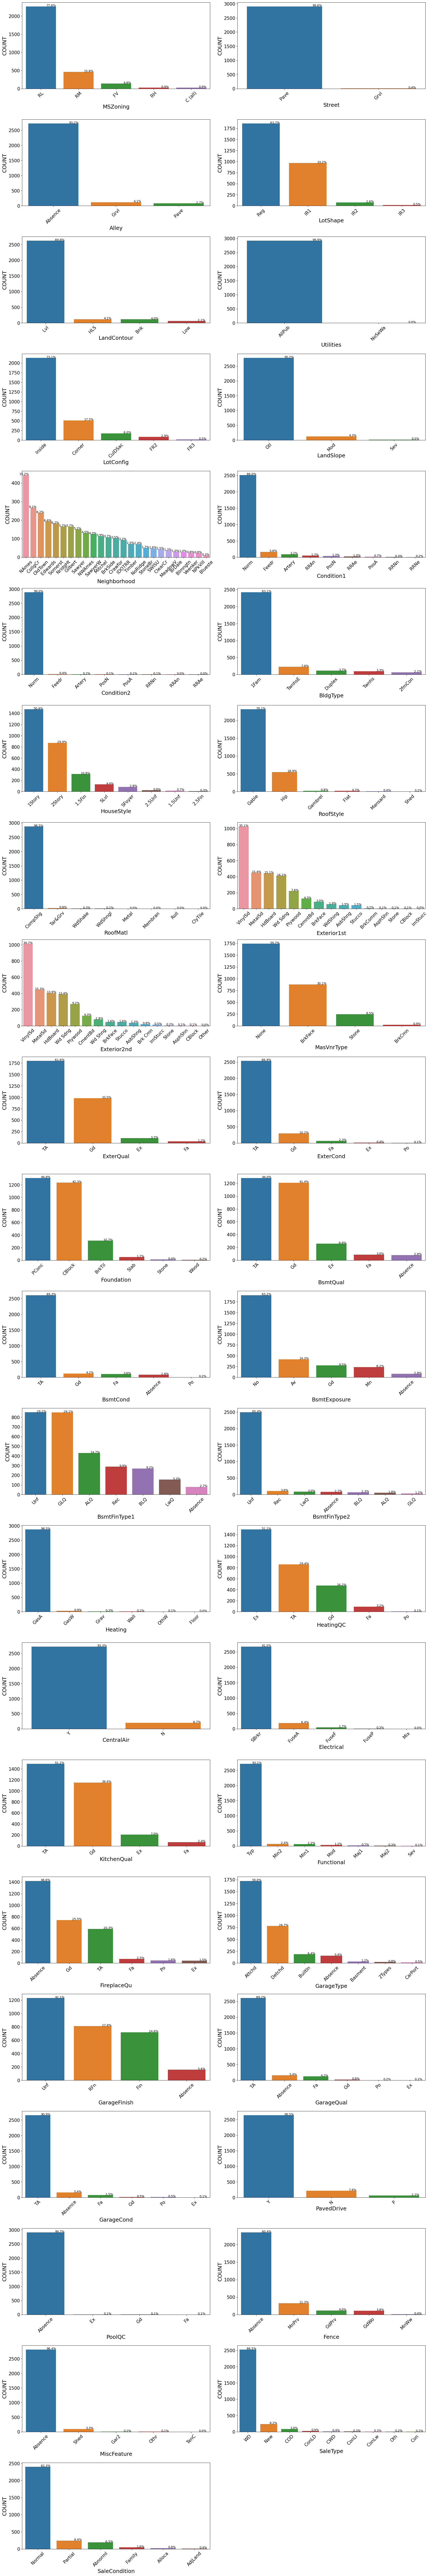

In [ ]:
#Second alternative for visualization
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(cat.columns):
    plt.subplot(26,2,index+1)
    ax = sns.countplot(x=cat.iloc[:,index], data=cat.dropna(), order=train[col].value_counts().sort_values(ascending=False).index)
    plt.ylabel('COUNT', size = 18,color="black")
    plt.xlabel(col, fontsize = 18,color="black")
    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(train))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')

fig.tight_layout(pad=1.0)

In [ ]:
cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### 2.1.A.1Creating New Features

In [ ]:
#Adding some columns related to features that there are in the house (train)
train['Pool_'] = train.apply(lambda x: 'No' if x['PoolQC']=='Absence' else 'Yes', axis=1)
train['Basement_'] = train.apply(lambda x: 'No' if x['BsmtQual']=='Absence' else 'Yes', axis=1)
train['Fence_'] = train.apply(lambda x: 'No' if x['Fence']=='Absence' else 'Yes', axis=1)
train['Fireplace_'] = train.apply(lambda x: 'No' if x['FireplaceQu']=='Absence' else 'Yes', axis=1)
train['Garage_'] = train.apply(lambda x: 'No' if x['GarageType']=='Absence' else 'Yes', axis=1)
train['Alley_'] = train.apply(lambda x: 'No' if x['Alley']=='Absence' else 'Yes', axis=1)

In [ ]:
train[['Pool_','Basement_','Fence_','Fireplace_','Garage_','Alley_']].head()

Pool_ Basement_ Fence_ Fireplace_ Garage_ Alley_
0    No       Yes     No         No     Yes     No
1    No       Yes     No        Yes     Yes     No
2    No       Yes     No        Yes     Yes     No
3    No       Yes     No        Yes     Yes     No
4    No       Yes     No        Yes     Yes     No

In [ ]:
print(train.shape)


(2919, 87)


#### 2.1.A.2 Elimination of the columns with more than 95% values

In [ ]:
# Create empty lists to store the useful and useless variables
usefull = []
useless = []

cat = train.select_dtypes(include=['object'])

# Create a dictionary to store the category counts
category_counts = {}

# Loop through each categorical variable
for variable in cat:

    # Count the number of occurrences of each category in the variable
    category_counts[variable] = {}
    for category in train[variable].unique():
        # Skip NaN categories
        if pd.isna(category):
            continue
        category_counts[variable][category] = train[variable].value_counts(normalize=True)[category]

    # Calculate the total count of categories across all variables
    total_count = sum(category_counts[variable].values())

    # Check if any category has a count of 95% or more
    for category in category_counts[variable]:
        if category_counts[variable][category] >= 0.95:
            useless.append(variable)
            break

    # If no category has a count of 95% or more, add the variable to the useful list
    if variable not in useless:
        usefull.append(variable)

    # Calculate the percentage of each category relative to the total count
    for category in category_counts[variable]:
        category_counts[variable][category] = category_counts[variable][category] / total_count * 100

# Print the category counts for each variable
for variable in cat:
    print(f"Variable: {variable}")
    for category, count in category_counts[variable].items():
        print(f"{category}: {count:.2f}%")
    print("\n")

# Print the useful and useless lists
print(f"Usefull variables: {usefull}")
print(f"Useless variables: {useless}")

Variable: MSZoning
RL: 77.70%
RM: 15.78%
C (all): 0.86%
FV: 4.77%
RH: 0.89%


Variable: Street
Pave: 99.59%
Grvl: 0.41%


Variable: Alley
Absence: 93.22%
Grvl: 4.11%
Pave: 2.67%


Variable: LotShape
Reg: 63.69%
IR1: 33.16%
IR2: 2.60%
IR3: 0.55%


Variable: LandContour
Lvl: 89.83%
Bnk: 4.01%
Low: 2.06%
HLS: 4.11%


Variable: Utilities
AllPub: 99.97%
NoSeWa: 0.03%


Variable: LotConfig
Inside: 73.07%
FR2: 2.91%
Corner: 17.51%
CulDSac: 6.03%
FR3: 0.48%


Variable: LandSlope
Gtl: 95.17%
Mod: 4.28%
Sev: 0.55%


Variable: Neighborhood
CollgCr: 9.15%
Veenker: 0.82%
Crawfor: 3.53%
NoRidge: 2.43%
Mitchel: 3.91%
Somerst: 6.24%
NWAmes: 4.49%
OldTown: 8.19%
BrkSide: 3.70%
Sawyer: 5.17%
NridgHt: 5.69%
NAmes: 15.18%
SawyerW: 4.28%
IDOTRR: 3.19%
MeadowV: 1.27%
Edwards: 6.65%
Timber: 2.47%
Gilbert: 5.65%
StoneBr: 1.75%
ClearCr: 1.51%
NPkVill: 0.79%
Blmngtn: 0.96%
BrDale: 1.03%
SWISU: 1.64%
Blueste: 0.34%


Variable: Condition1
Norm: 86.02%
Feedr: 5.62%
PosN: 1.34%
Artery: 3.15%
RRAe: 0.96%
RRNn: 0.31%

In [ ]:
# Print the category counts for each variable
for variable in useless:
    print(f"Variable: {variable}")
    for category, count in category_counts[variable].items():
        print(f"{category}: {count:.2f}%")
    print("\n")

Variable: Street
Pave: 99.59%
Grvl: 0.41%


Variable: Utilities
AllPub: 99.97%
NoSeWa: 0.03%


Variable: LandSlope
Gtl: 95.17%
Mod: 4.28%
Sev: 0.55%


Variable: Condition2
Norm: 98.97%
Artery: 0.17%
RRNn: 0.07%
Feedr: 0.45%
PosN: 0.14%
PosA: 0.14%
RRAn: 0.03%
RRAe: 0.03%


Variable: RoofMatl
CompShg: 98.53%
WdShngl: 0.24%
Metal: 0.03%
WdShake: 0.31%
Membran: 0.03%
Tar&Grv: 0.79%
Roll: 0.03%
ClyTile: 0.03%


Variable: Heating
GasA: 98.46%
GasW: 0.92%
Grav: 0.31%
Wall: 0.21%
OthW: 0.07%
Floor: 0.03%


Variable: PoolQC
Absence: 99.66%
Ex: 0.14%
Fa: 0.07%
Gd: 0.14%


Variable: MiscFeature
Absence: 96.40%
Shed: 3.25%
Gar2: 0.17%
Othr: 0.14%
TenC: 0.03%


Variable: Pool_
No: 99.66%
Yes: 0.34%


Variable: Basement_
Yes: 97.23%
No: 2.77%




In [ ]:
useless

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature',
 'Pool_',
 'Basement_']

<Axes: xlabel='PoolQC', ylabel='SalePrice'>

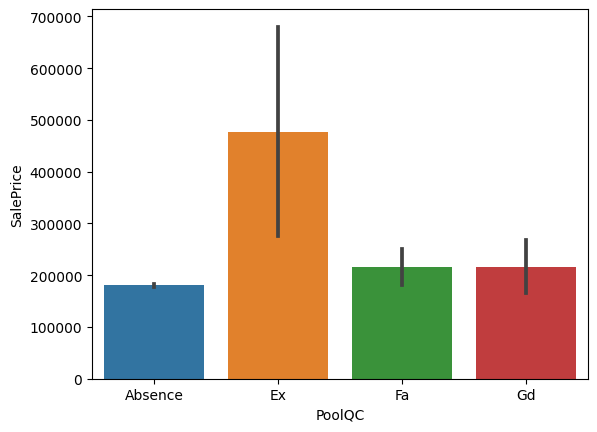

In [ ]:
sns.barplot(x=train['PoolQC'], y=train['SalePrice'])

In [ ]:
#We have decided to remove these columns from dataset due to we believe that they do not give us accurate information.
train = train.drop(useless, axis=1)

print(train.shape)


(2919, 77)


In [ ]:
cat_2 = train.select_dtypes(include='object')
for col in cat_2:
  print(train[col].value_counts(normalize=True).round(2))

RL         0.78
RM         0.16
FV         0.05
RH         0.01
C (all)    0.01
Name: MSZoning, dtype: float64
Absence    0.93
Grvl       0.04
Pave       0.03
Name: Alley, dtype: float64
Reg    0.64
IR1    0.33
IR2    0.03
IR3    0.01
Name: LotShape, dtype: float64
Lvl    0.90
HLS    0.04
Bnk    0.04
Low    0.02
Name: LandContour, dtype: float64
Inside     0.73
Corner     0.18
CulDSac    0.06
FR2        0.03
FR3        0.00
Name: LotConfig, dtype: float64
NAmes      0.15
CollgCr    0.09
OldTown    0.08
Edwards    0.07
Somerst    0.06
NridgHt    0.06
Gilbert    0.06
Sawyer     0.05
NWAmes     0.04
SawyerW    0.04
Mitchel    0.04
BrkSide    0.04
Crawfor    0.04
IDOTRR     0.03
Timber     0.02
NoRidge    0.02
StoneBr    0.02
SWISU      0.02
ClearCr    0.02
MeadowV    0.01
BrDale     0.01
Blmngtn    0.01
Veenker    0.01
NPkVill    0.01
Blueste    0.00
Name: Neighborhood, dtype: float64
Norm      0.86
Feedr     0.06
Artery    0.03
RRAn      0.02
PosN      0.01
RRAe      0.01
PosA      0.01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a list of categorical columns
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# create a crosstab and plot heatmap for each pair of columns with mean SalePrice greater than 300000
for i, col in enumerate(cat_cols):
    for j in range(i+1, len(cat_cols)):
        other_col = cat_cols[j]
        ct = pd.crosstab(train[col], train[other_col], values=train['SalePrice'], aggfunc=np.mean).round(0)
        if ct.mean().mean() > 250000:
            fig, ax = plt.subplots()
            sns.heatmap(ct, annot=True, fmt='g', cmap='rocket_r', cbar=False, ax=ax)
            ax.set_title(f"{col} vs {other_col}")
plt.show()

In [ ]:
#train[(train['Alley_']=='No')&(train['ExterQual']=='Ex')]
#train[(train['Fence_']=='No')&(train['ExterQual']=='Ex')]
#train[(train['ExterQual']=='Ex')&(train['MasVnrType']=='Stone')]
#train[(train['ExterQual']=='Ex')&(train['MasVnrType']=='BrkFace')]
#train[(train['ExterQual']=='Ex')&(train['RoofStylpe']=='Hip')]
train[(train['ExterQual']=='Ex')&(train['Condition1']=='PosA')]

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
203   1664          20       RL        105.0    13693  Absence      Reg   
807   2268          20       RL         81.0    13870  Absence      IR1   
1138  2599          20       RL         85.0    12633  Absence      IR1   

     LandContour LotConfig Neighborhood  ... MiscVal MoSold YrSold  SaleType  \
203          Lvl    Inside      NridgHt  ...       0      3   2009        WD   
807          HLS    Inside      StoneBr  ...       0     10   2007       New   
1138         HLS    Inside       Timber  ...       0      9   2007       New   

      SaleCondition  SalePrice  Fence_ Fireplace_ Garage_ Alley_  
203          Normal   610000.0      No        Yes     Yes     No  
807         Partial   455000.0      No        Yes     Yes     No  
1138        Partial   392000.0      No        Yes     Yes     No  

[3 rows x 77 columns]

In [ ]:
col = train[['Fence_','Fireplace_','Garage_','Alley_']]
for col in col:
  print(train[col].value_counts(normalize=True).round(2))

No     0.8
Yes    0.2
Name: Fence_, dtype: float64
Yes    0.51
No     0.49
Name: Fireplace_, dtype: float64
Yes    0.95
No     0.05
Name: Garage_, dtype: float64
No     0.93
Yes    0.07
Name: Alley_, dtype: float64


#### 2.1.A.3 Rare Encoding

In [ ]:
# Get list of categorical columns
categorical_columns = train.select_dtypes(include='object').columns

# Set the threshold for rare categories
threshold = 0.05

# Loop over all categorical columns and apply rare encoding
for column in categorical_columns:
    counts = train[column].value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index.tolist()

    def replace_with_rare(category):
        if category in rare_categories:
            return 'rare_category'
        else:
            return category

    train[column] = train[column].apply(replace_with_rare)

In [ ]:
for col in train[categorical_columns]:
  print(train[col].value_counts(normalize=True).round(2))

RL               0.78
RM               0.16
rare_category    0.07
Name: MSZoning, dtype: float64
Absence          0.93
rare_category    0.07
Name: Alley, dtype: float64
Reg              0.64
IR1              0.33
rare_category    0.03
Name: LotShape, dtype: float64
Lvl              0.9
rare_category    0.1
Name: LandContour, dtype: float64
Inside           0.73
Corner           0.18
CulDSac          0.06
rare_category    0.03
Name: LotConfig, dtype: float64
rare_category    0.38
NAmes            0.15
CollgCr          0.09
OldTown          0.08
Edwards          0.07
Somerst          0.06
NridgHt          0.06
Gilbert          0.06
Sawyer           0.05
Name: Neighborhood, dtype: float64
Norm             0.86
rare_category    0.08
Feedr            0.06
Name: Condition1, dtype: float64
1Fam             0.83
rare_category    0.09
TwnhsE           0.08
Name: BldgType, dtype: float64
1Story           0.50
2Story           0.30
1.5Fin           0.11
rare_category    0.09
Name: HouseStyle, dty

In [ ]:
print(train.shape)


(2919, 77)


### 2.1.B. Numerical Features

In [ ]:
#checked the numerical columns
num = train.select_dtypes(exclude=['object'])
num


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0       706.0  ...           0   
1          1976          1976         0.0       978.0  ...         298   
2          2001          2002       162.0       486.0  ...           0   
3          1915          1970         0.0       216.0  ...           0   
4          2000          2000       350.0       655.0  ...         192   
...         ...           ...         ...         ...  ...         ...   
1454       1970          1970         0.0         0.0  ...           0   
1455       1970          1970         0.0       252.0  ...           0   
1456       1960          1996         0.0      1224.0  ...         474   
1457       1992          1992         0.0       337.0  ...          80   
1458       1993          1994        94.0       758.0  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1454            0              0          0            0         0        0   
1455           24              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           32              0          0            0         0      700   
1458           48              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   208500.0  
1          5    2007   181500.0  
2          9    2008   223500.0  
3          2    2006   140000.0  
4         12    2008   250000.0  
...      ...     ...        ...  
1454       6    2006    90500.0  
1455       4    2006    71000.0  
1456       9    2006   131000.0  
1457       7    2006   132000.0  
1458      11    2006   188000.0  

[2919 rows x 38 columns]

In [ ]:
num[['1stFlrSF','2ndFlrSF']]

1stFlrSF  2ndFlrSF
0          856       854
1         1262         0
2          920       866
3          961       756
4         1145      1053
...        ...       ...
1454       546       546
1455       546       546
1456      1224         0
1457       970         0
1458       996      1004

[2919 rows x 2 columns]

In [ ]:
#checked the summary statistics of the numerical variables - eliminated the ID column because its not a variable that we will use in model.
#We have to check the columns that have 2 or 3 different values because they can be categorical not numerical variables.
#MSSubClass integer but it identifies the type of dwelling involved in the sale.
#OverallQual integer but it rates overall material of the house (ordinal) - kategorikmiş gibi davranıcaz başta. Hist veya barplot
#OverallCond integer but it rates overall condition of the house (ordinal)
#YearBuilt integer but it is a date. - günümüzden çıkarıp yaş olarak da dikkate alabiliriz yıl olarak da kalabilir.
#YearRemodAdd integer but it is a date.
#MoSold integer but it is month sold
#YrSold integer but its year sold
#GarageYrBuilt is float but its year garage was built, so type of the column should be changed.
num.iloc[:,1:].describe([0.25,0.50,0.75,0.99]).T

count           mean           std      min       25%  \
MSSubClass     2919.0      57.137718     42.517628     20.0      20.0   
LotFrontage    2433.0      69.305795     23.344905     21.0      59.0   
LotArea        2919.0   10168.114080   7886.996359   1300.0    7478.0   
OverallQual    2919.0       6.089072      1.409947      1.0       5.0   
OverallCond    2919.0       5.564577      1.113131      1.0       5.0   
YearBuilt      2919.0    1971.312778     30.291442   1872.0    1953.5   
YearRemodAdd   2919.0    1984.264474     20.894344   1950.0    1965.0   
MasVnrArea     2896.0     102.201312    179.334253      0.0       0.0   
BsmtFinSF1     2918.0     441.423235    455.610826      0.0       0.0   
BsmtFinSF2     2918.0      49.582248    169.205611      0.0       0.0   
BsmtUnfSF      2918.0     560.772104    439.543659      0.0     220.0   
TotalBsmtSF    2918.0    1051.777587    440.766258      0.0     793.0   
1stFlrSF       2919.0    1159.581706    392.362079    334.0     876.0   
2ndFlrSF       2919.0     336.483727    428.701456      0.0       0.0   
LowQualFinSF   2919.0       4.694416     46.396825      0.0       0.0   
GrLivArea      2919.0    1500.759849    506.051045    334.0    1126.0   
BsmtFullBath   2917.0       0.429894      0.524736      0.0       0.0   
BsmtHalfBath   2917.0       0.061364      0.245687      0.0       0.0   
FullBath       2919.0       1.568003      0.552969      0.0       1.0   
HalfBath       2919.0       0.380267      0.502872      0.0       0.0   
BedroomAbvGr   2919.0       2.860226      0.822693      0.0       2.0   
KitchenAbvGr   2919.0       1.044536      0.214462      0.0       1.0   
TotRmsAbvGrd   2919.0       6.451524      1.569379      2.0       5.0   
Fireplaces     2919.0       0.597122      0.646129      0.0       0.0   
GarageYrBlt    2760.0    1978.113406     25.574285   1895.0    1960.0   
GarageCars     2918.0       1.766621      0.761624      0.0       1.0   
GarageArea     2918.0     472.874572    215.394815      0.0     320.0   
WoodDeckSF     2919.0      93.709832    126.526589      0.0       0.0   
OpenPorchSF    2919.0      47.486811     67.575493      0.0       0.0   
EnclosedPorch  2919.0      23.098321     64.244246      0.0       0.0   
3SsnPorch      2919.0       2.602261     25.188169      0.0       0.0   
ScreenPorch    2919.0      16.062350     56.184365      0.0       0.0   
PoolArea       2919.0       2.251799     35.663946      0.0       0.0   
MiscVal        2919.0      50.825968    567.402211      0.0       0.0   
MoSold         2919.0       6.213087      2.714762      1.0       4.0   
YrSold         2919.0    2007.792737      1.314964   2006.0    2007.0   
SalePrice      2919.0  180707.333333  79970.412811  12789.0  129325.0   

                    50%       75%        99%       max  
MSSubClass         50.0      70.0     190.00     190.0  
LotFrontage        68.0      80.0     135.68     313.0  
LotArea          9453.0   11570.0   33038.64  215245.0  
OverallQual         6.0       7.0      10.00      10.0  
OverallCond         5.0       6.0       9.00       9.0  
YearBuilt        1973.0    2001.0    2008.00    2010.0  
YearRemodAdd     1993.0    2004.0    2009.00    2010.0  
MasVnrArea          0.0     164.0     771.05    1600.0  
BsmtFinSF1        368.5     733.0    1635.32    5644.0  
BsmtFinSF2          0.0       0.0     874.66    1526.0  
BsmtUnfSF         467.0     805.5    1776.49    2336.0  
TotalBsmtSF       989.5    1302.0    2198.30    6110.0  
1stFlrSF         1082.0    1387.5    2288.02    5095.0  
2ndFlrSF            0.0     704.0    1400.20    2065.0  
LowQualFinSF        0.0       0.0     153.84    1064.0  
GrLivArea        1444.0    1743.5    2935.72    5642.0  
BsmtFullBath        0.0       1.0       2.00       3.0  
BsmtHalfBath        0.0       0.0       1.00       2.0  
FullBath            2.0       2.0       3.00       4.0  
HalfBath            0.0       1.0       1.00       2.0  
BedroomAbvGr        3.0       3.0       5.00

In [ ]:
#droped the Id column in num dataset to explore the data correctly.
num_2 = num.drop(['Id','GarageYrBlt', 'MoSold','MSSubClass', 'YearBuilt','YearRemodAdd','YrSold','OverallCond','OverallQual','GarageCars','BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], axis=1)
num_2

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0       706.0         0.0      150.0   
1            80.0     9600         0.0       978.0         0.0      284.0   
2            68.0    11250       162.0       486.0         0.0      434.0   
3            60.0     9550         0.0       216.0         0.0      540.0   
4            84.0    14260       350.0       655.0         0.0      490.0   
...           ...      ...         ...         ...         ...        ...   
1454         21.0     1936         0.0         0.0         0.0      546.0   
1455         21.0     1894         0.0       252.0         0.0      294.0   
1456        160.0    20000         0.0      1224.0         0.0        0.0   
1457         62.0    10441         0.0       337.0         0.0      575.0   
1458         74.0     9627        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0           856.0       856       854             0       1710       548.0   
1          1262.0      1262         0             0       1262       460.0   
2           920.0       920       866             0       1786       608.0   
3           756.0       961       756             0       1717       642.0   
4          1145.0      1145      1053             0       2198       836.0   
...           ...       ...       ...           ...        ...         ...   
1454        546.0       546       546             0       1092         0.0   
1455        546.0       546       546             0       1092       286.0   
1456       1224.0      1224         0             0       1224       576.0   
1457        912.0       970         0             0        970         0.0   
1458        996.0       996      1004             0       2000       650.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1454           0            0              0          0            0   
1455           0           24              0          0            0   
1456         474            0              0          0            0   
1457          80           32              0          0            0   
1458         190           48              0          0            0   

      PoolArea  MiscVal  SalePrice  
0            0        0   208500.0  
1            0        0   181500.0  
2            0        0   223500.0  
3            0        0   140000.0  
4            0        0   250000.0  
...        ...      ...        ...  
1454         0        0    90500.0  
1455         0        0    71000.0  
1456         0        0   131000.0  
1457         0      700   132000.0  
1458         0        0   188000.0  

[2919 rows x 20 columns]

In [ ]:
num_2.describe().T

count           mean           std      min       25%  \
LotFrontage    2433.0      69.305795     23.344905     21.0      59.0   
LotArea        2919.0   10168.114080   7886.996359   1300.0    7478.0   
MasVnrArea     2896.0     102.201312    179.334253      0.0       0.0   
BsmtFinSF1     2918.0     441.423235    455.610826      0.0       0.0   
BsmtFinSF2     2918.0      49.582248    169.205611      0.0       0.0   
BsmtUnfSF      2918.0     560.772104    439.543659      0.0     220.0   
TotalBsmtSF    2918.0    1051.777587    440.766258      0.0     793.0   
1stFlrSF       2919.0    1159.581706    392.362079    334.0     876.0   
2ndFlrSF       2919.0     336.483727    428.701456      0.0       0.0   
LowQualFinSF   2919.0       4.694416     46.396825      0.0       0.0   
GrLivArea      2919.0    1500.759849    506.051045    334.0    1126.0   
GarageArea     2918.0     472.874572    215.394815      0.0     320.0   
WoodDeckSF     2919.0      93.709832    126.526589      0.0       0.0   
OpenPorchSF    2919.0      47.486811     67.575493      0.0       0.0   
EnclosedPorch  2919.0      23.098321     64.244246      0.0       0.0   
3SsnPorch      2919.0       2.602261     25.188169      0.0       0.0   
ScreenPorch    2919.0      16.062350     56.184365      0.0       0.0   
PoolArea       2919.0       2.251799     35.663946      0.0       0.0   
MiscVal        2919.0      50.825968    567.402211      0.0       0.0   
SalePrice      2919.0  180707.333333  79970.412811  12789.0  129325.0   

                    50%       75%       max  
LotFrontage        68.0      80.0     313.0  
LotArea          9453.0   11570.0  215245.0  
MasVnrArea          0.0     164.0    1600.0  
BsmtFinSF1        368.5     733.0    5644.0  
BsmtFinSF2          0.0       0.0    1526.0  
BsmtUnfSF         467.0     805.5    2336.0  
TotalBsmtSF       989.5    1302.0    6110.0  
1stFlrSF         1082.0    1387.5    5095.0  
2ndFlrSF            0.0     704.0    2065.0  
LowQualFinSF        0.0       0.0    1064.0  
GrLivArea        1444.0    1743.5    5642.0  
GarageArea        480.0     576.0    1488.0  
WoodDeckSF          0.0     168.0    1424.0  
OpenPorchSF        26.0      70.0     742.0  
EnclosedPorch       0.0       0.0    1012.0  
3SsnPorch           0.0       0.0     508.0  
ScreenPorch         0.0       0.0     576.0  
PoolArea            0.0       0.0     800.0  
MiscVal             0.0       0.0   17000.0  
SalePrice      160000.0  213495.0  755000.0

<ipython-input-42-bdb95530dfab>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_2.iloc[:,index])
<ipython-input-42-bdb95530dfab>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_2.iloc[:,index])
<ipython-input-42-bdb95530dfab>:5: UserWarning: 

`distplot` is a deprecated function an

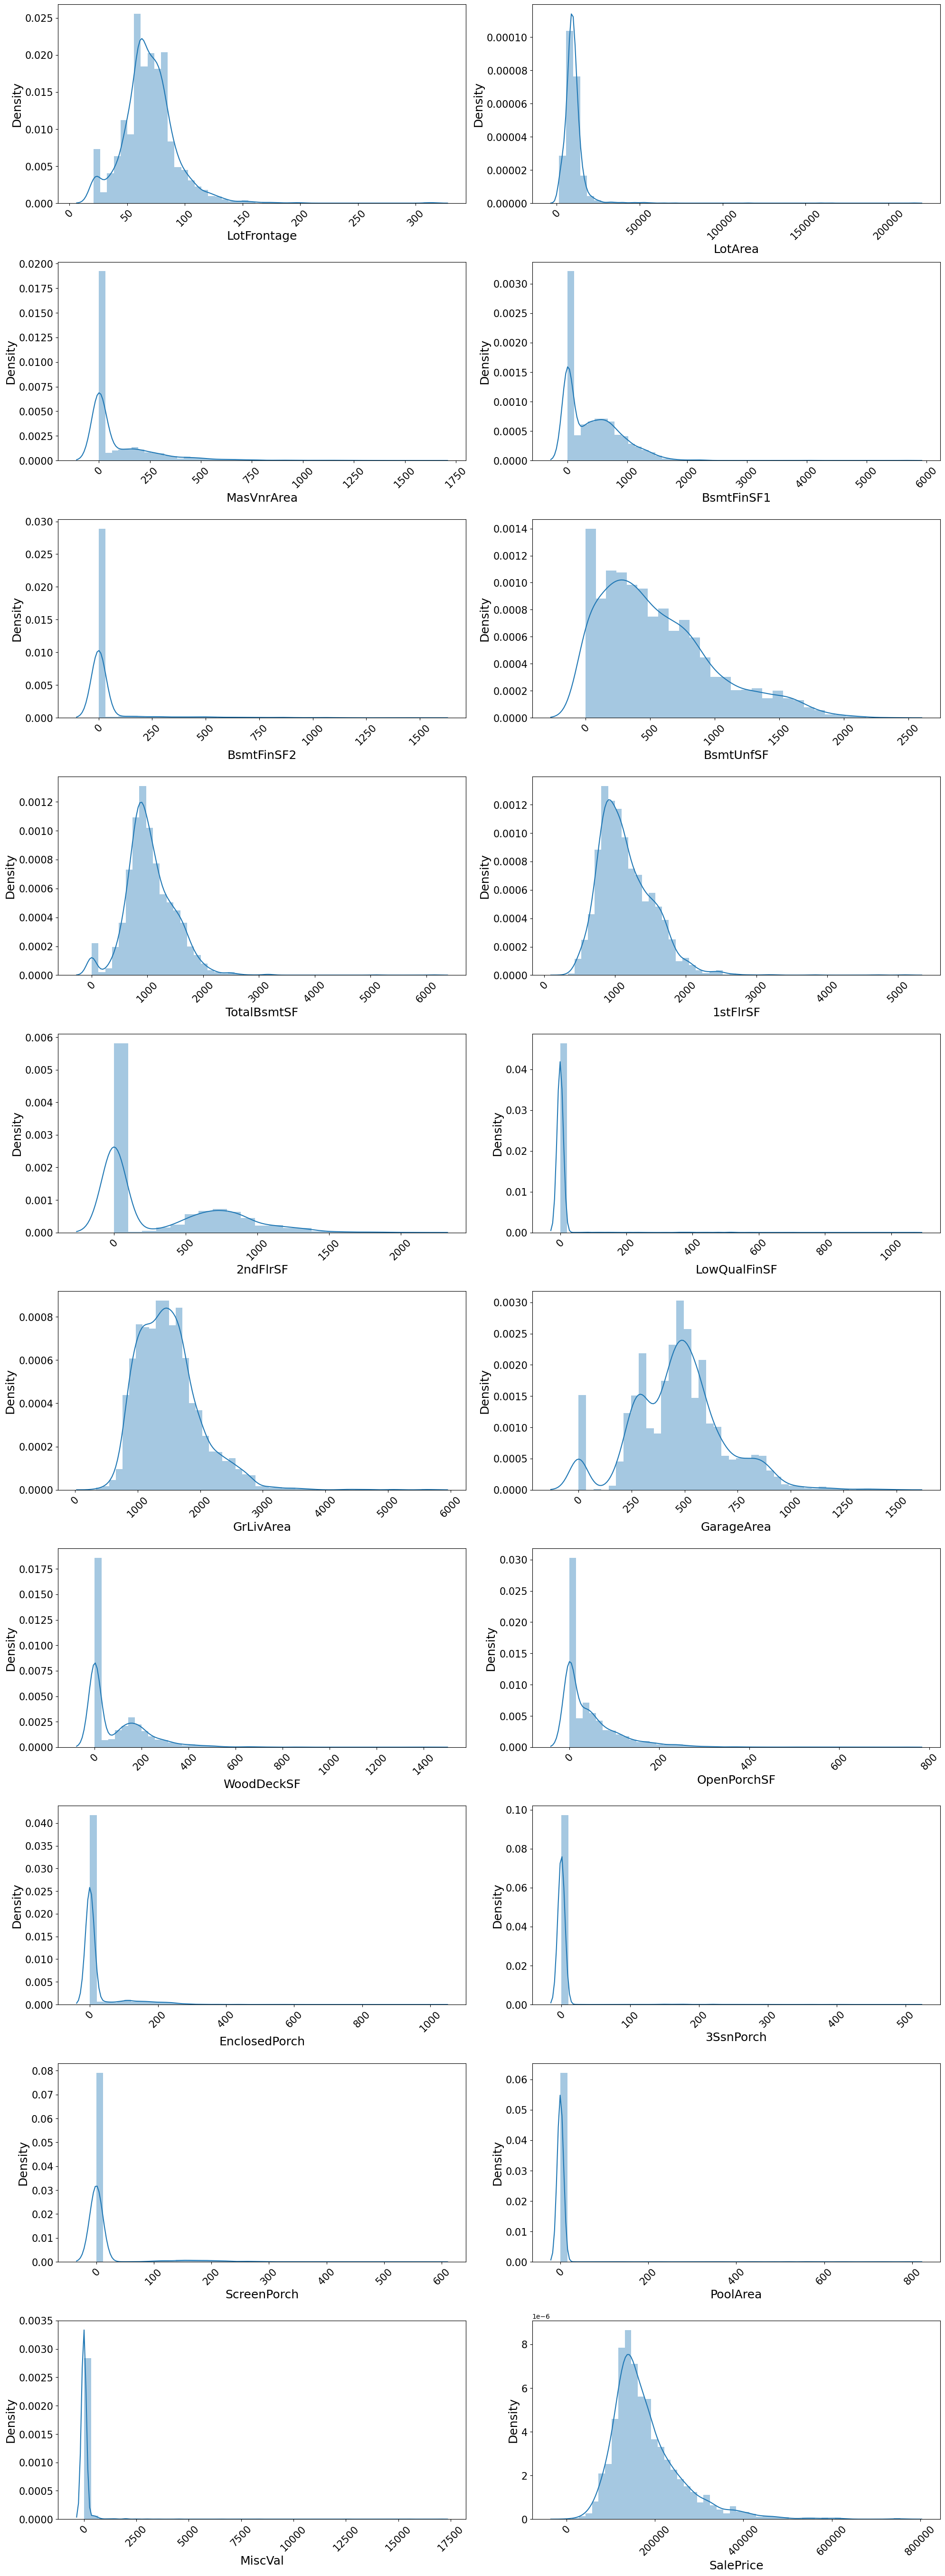

In [ ]:
#Second alternative for visualization
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_2.columns):
    plt.subplot(26,2,index+1)
    sns.distplot(x=num_2.iloc[:,index])
    plt.ylabel('Density', size = 18,color="black")
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

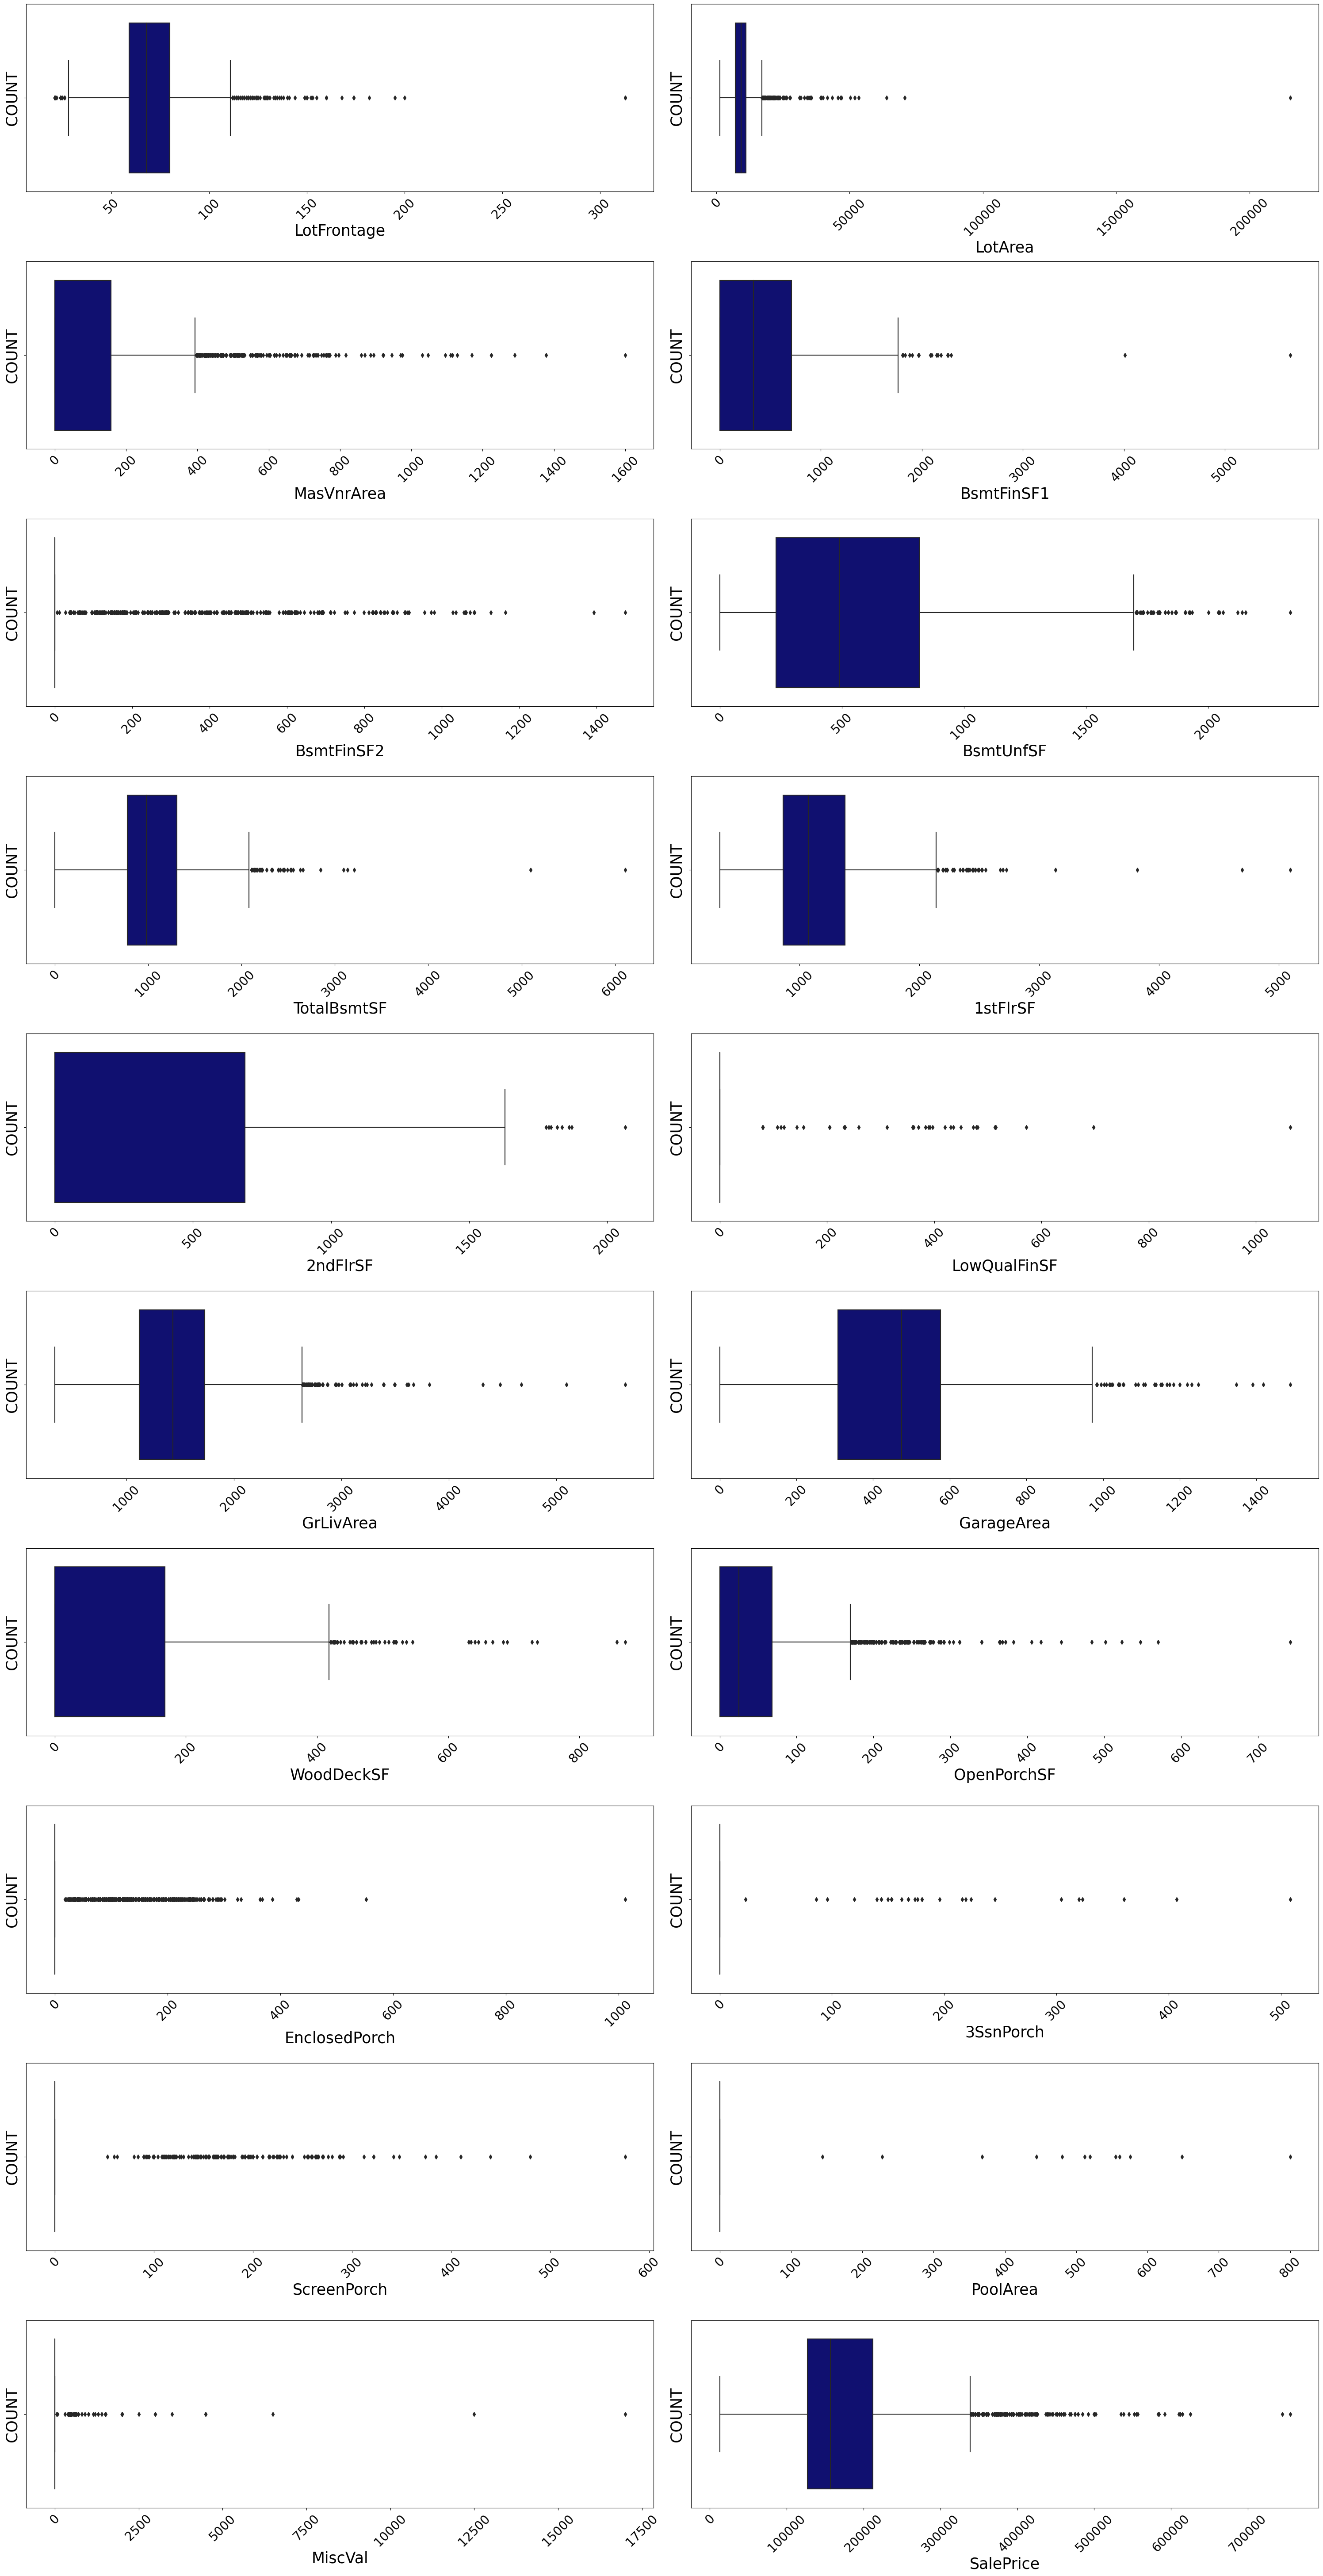

In [ ]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_2):
    plt.subplot(26,2,index+1)
    sns.boxplot(x=col, data=num_2.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

#### 2.1.B.a Elimination of the columns with more then 90% zero

In [ ]:
#Check the features have zero value
num_zeros_per_col = (train == 0).sum(axis=0).sort_values(ascending=False).reset_index().rename(columns={'index': 'Feature', 0: 'Count'})
num_zeros_per_col['Proportion'] = num_zeros_per_col['Count'] / len(train)
zero_columns_90_percent = num_zeros_per_col[num_zeros_per_col['Proportion']>=0.90]
zero_columns_90_percent

Feature  Count  Proportion
0      PoolArea   2906    0.995546
1     3SsnPorch   2882    0.987324
2  LowQualFinSF   2879    0.986297
3       MiscVal   2816    0.964714
4  BsmtHalfBath   2742    0.939363
5   ScreenPorch   2663    0.912299

In [ ]:
#examine more columns with zero values
zero_columns = zero_columns_90_percent['Feature'].values
train[zero_columns].nunique()

PoolArea         14
3SsnPorch        31
LowQualFinSF     36
MiscVal          38
BsmtHalfBath      3
ScreenPorch     121
dtype: int64

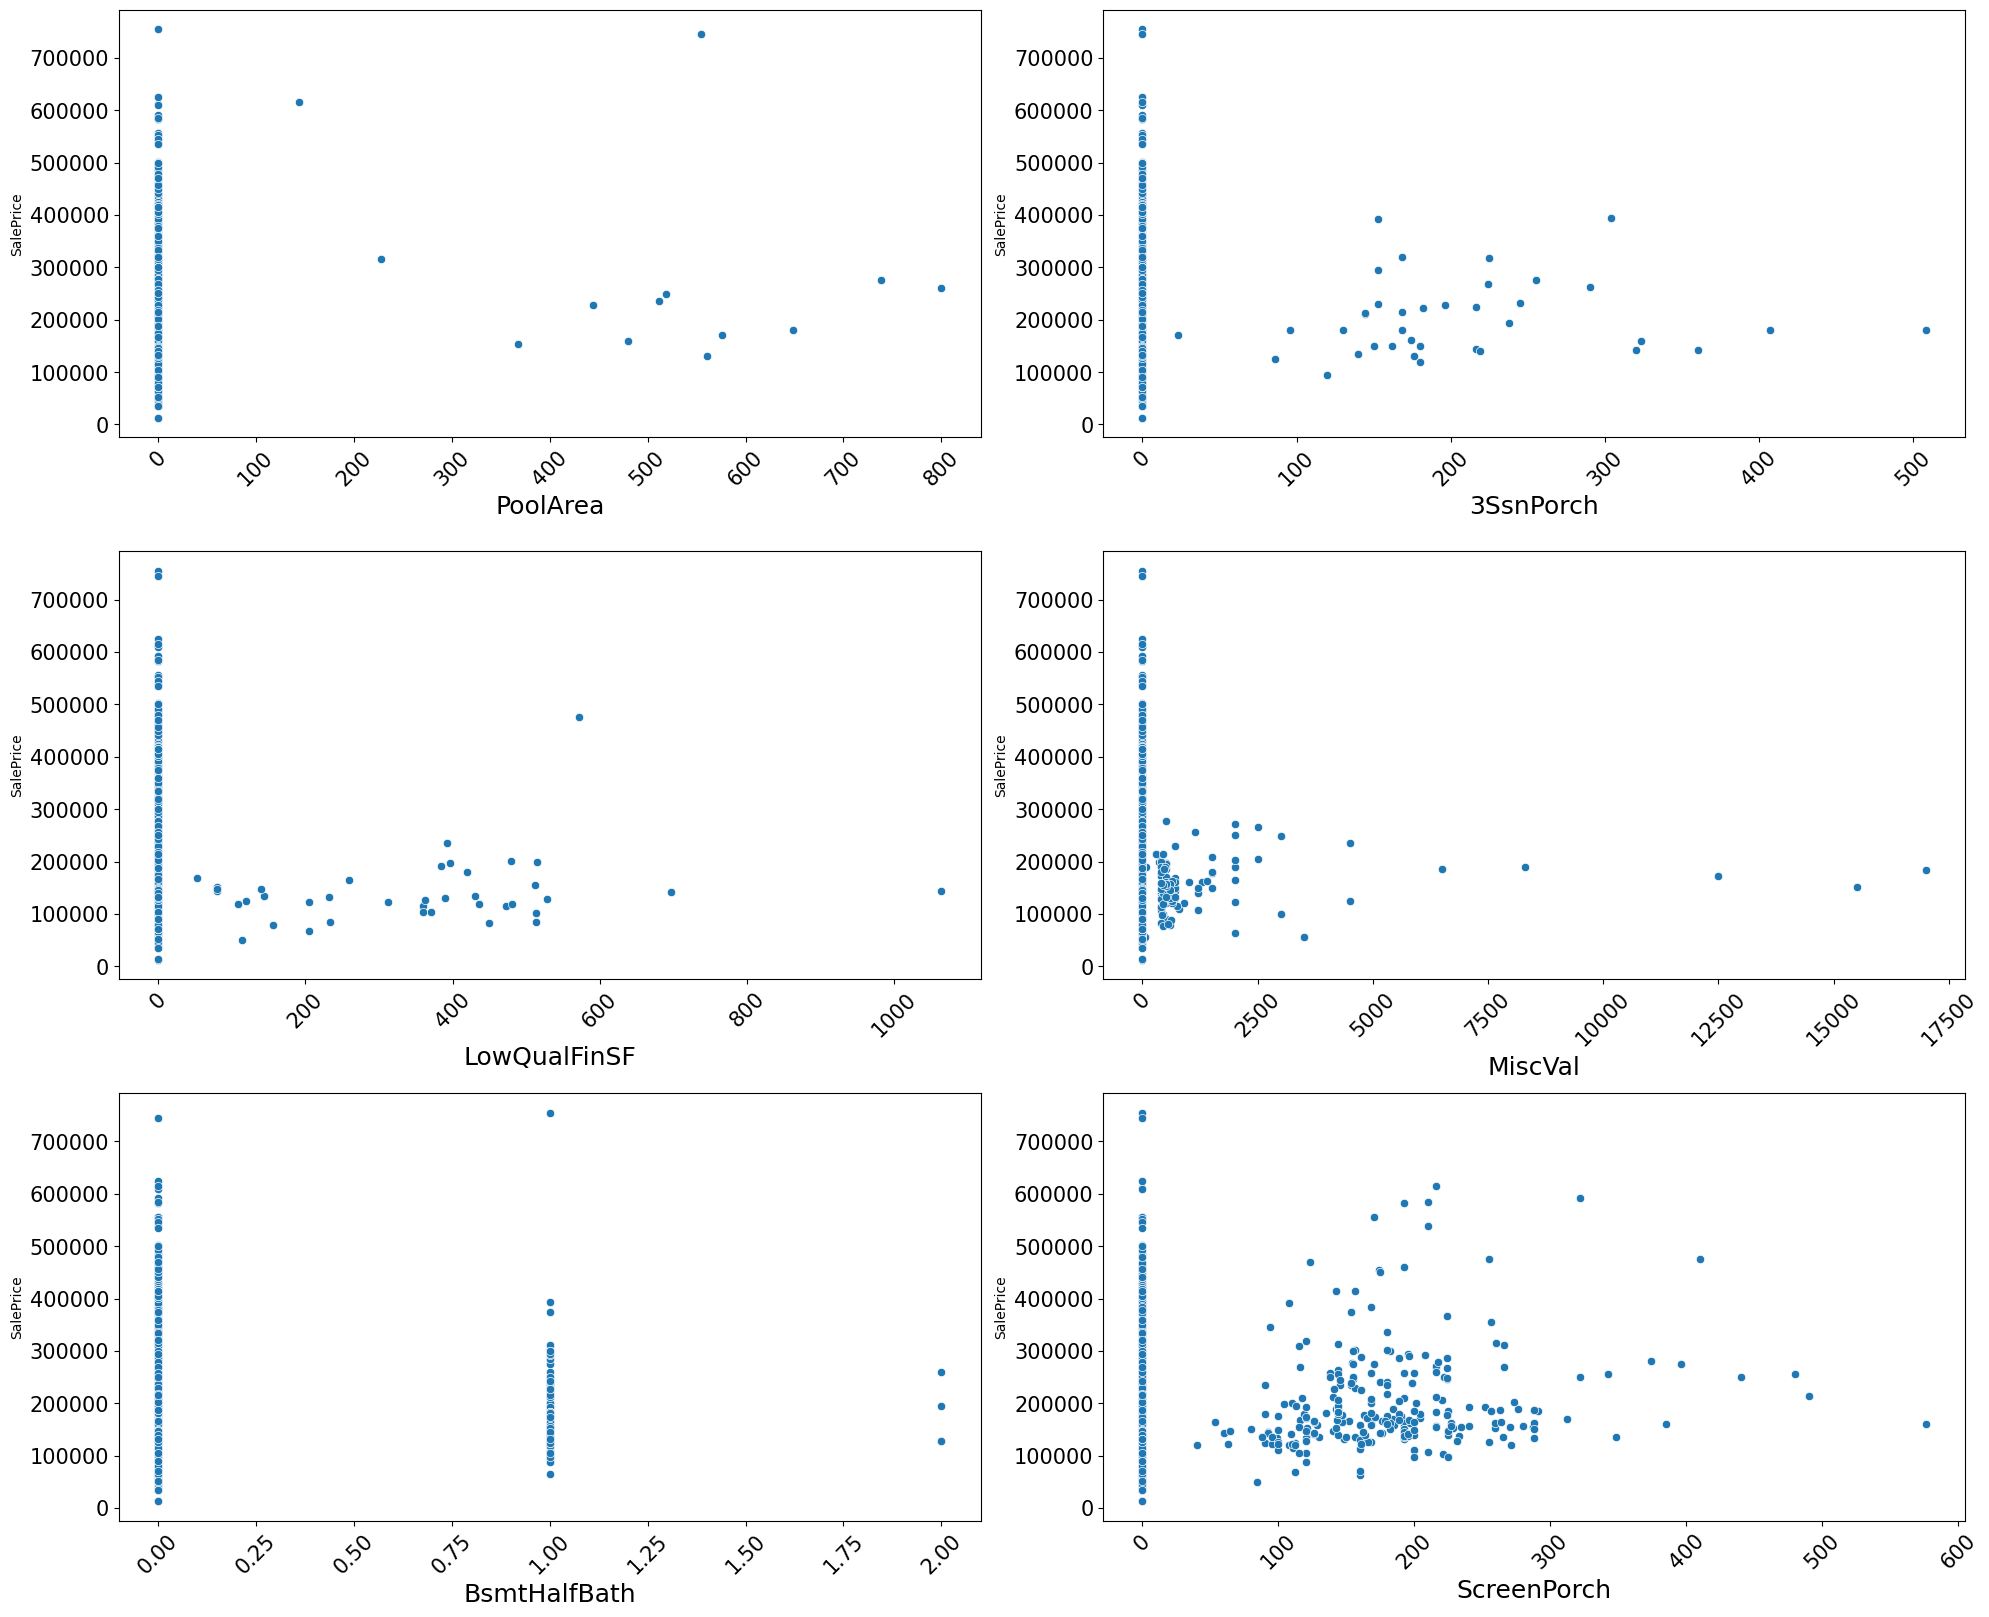

In [ ]:

fig = plt.figure(figsize=(20,140))
for index,col in enumerate(train[zero_columns].columns):
    plt.subplot(26,2,index+1)
    sns.scatterplot(x=train[zero_columns].iloc[:,index], y=train['SalePrice'])
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

In [ ]:
train[zero_columns].describe([0.25,0.50,0.75,0.99]).T

count       mean         std  min  25%  50%  75%     99%  \
PoolArea      2919.0   2.251799   35.663946  0.0  0.0  0.0  0.0    0.00   
3SsnPorch     2919.0   2.602261   25.188169  0.0  0.0  0.0  0.0  144.00   
LowQualFinSF  2919.0   4.694416   46.396825  0.0  0.0  0.0  0.0  153.84   
MiscVal       2919.0  50.825968  567.402211  0.0  0.0  0.0  0.0  982.00   
BsmtHalfBath  2917.0   0.061364    0.245687  0.0  0.0  0.0  0.0    1.00   
ScreenPorch   2919.0  16.062350   56.184365  0.0  0.0  0.0  0.0  259.82   

                  max  
PoolArea        800.0  
3SsnPorch       508.0  
LowQualFinSF   1064.0  
MiscVal       17000.0  
BsmtHalfBath      2.0  
ScreenPorch     576.0

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PoolArea'),
  Text(1, 0, '3SsnPorch'),
  Text(2, 0, 'LowQualFinSF'),
  Text(3, 0, 'MiscVal'),
  Text(4, 0, 'BsmtHalfBath'),
  Text(5, 0, 'ScreenPorch')])

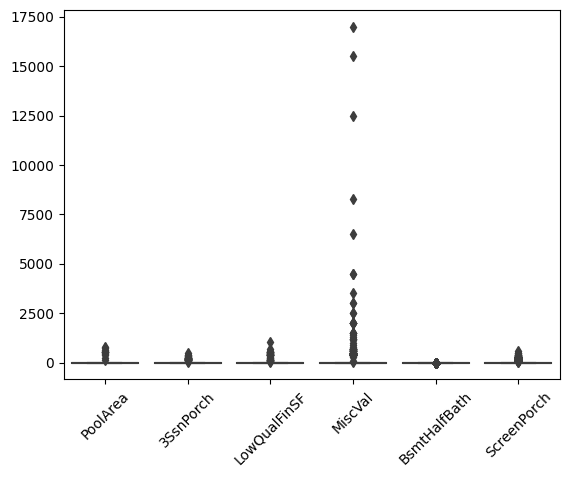

In [ ]:
sns.boxplot(train[zero_columns])
plt.xticks(rotation = 45)

In [ ]:
zero_columns

array(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch'], dtype=object)

In [ ]:
corr_with_saleprice = train.corr().loc[:, ['SalePrice', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal']]
# sort the resulting DataFrame by the 'SalePrice' column in descending order
corr_with_saleprice = corr_with_saleprice.sort_values(by='SalePrice', ascending=False)
corr_with_saleprice.T

<ipython-input-50-369545691eee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_saleprice = train.corr().loc[:, ['SalePrice', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal']]


SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.800888   0.708096    0.649512    0.641746   
PoolArea       0.068531     0.030740   0.135441    0.030424    0.053049   
3SsnPorch      0.032367     0.018715   0.006268    0.023383    0.029440   
LowQualFinSF  -0.037598    -0.048393   0.096916   -0.067336   -0.053551   
MiscVal       -0.015605     0.005562   0.067118   -0.016934    0.008446   

              TotalBsmtSF  1stFlrSF  YearBuilt  FullBath  YearRemodAdd  ...  \
SalePrice        0.633231  0.621541   0.558433  0.548138      0.533158  ...   
PoolArea         0.072216  0.121900   0.002304  0.028091     -0.011407  ...   
3SsnPorch        0.037892  0.044086   0.015958  0.015192      0.037433  ...   
LowQualFinSF    -0.023359 -0.012704  -0.144191 -0.002876     -0.060371  ...   
MiscVal          0.084002  0.093062  -0.010886 -0.010024     -0.003124  ...   

              BsmtFinSF2   MiscVal        Id    YrSold  BsmtHalfBath  \
SalePrice       0.005803 -0.015605 -0.017118 -0.030064     -0.035592   
PoolArea        0.044524  0.011921  0.014332 -0.052816      0.066851   
3SsnPorch      -0.023279 -0.000788 -0.046538  0.022560      0.026861   
LowQualFinSF   -0.004923 -0.005973 -0.037816 -0.002257     -0.013500   
MiscVal        -0.005139  1.000000  0.008244  0.008445      0.036902   

              LowQualFinSF  MSSubClass  OverallCond  KitchenAbvGr  \
SalePrice        -0.037598   -0.087039    -0.101488     -0.119693   
PoolArea          0.035177   -0.003080    -0.016876     -0.013116   
3SsnPorch        -0.004545   -0.037529     0.043739     -0.021462   
LowQualFinSF      1.000000    0.026482     0.009048      0.000438   
MiscVal          -0.005973   -0.028867     0.033956      0.025078   

              EnclosedPorch  
SalePrice         -0.128527  
PoolArea           0.092534  
3SsnPorch         -0.032822  
LowQualFinSF       0.087212  
MiscVal            0.008654  

[5 rows x 38 columns]

In [ ]:
zero_columns

array(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch'], dtype=object)

In [ ]:
#dropped the zero columns from orijinal dataset.
train = train.drop(zero_columns, axis=1)

print(train.shape)


(2919, 71)


In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0   1          60       RL         65.0     8450  Absence      Reg   
1   2          20       RL         80.0     9600  Absence      Reg   
2   3          60       RL         68.0    11250  Absence      IR1   
3   4          70       RL         60.0     9550  Absence      IR1   
4   5          60       RL         84.0    14260  Absence      IR1   

  LandContour      LotConfig   Neighborhood  ...    Fence MoSold YrSold  \
0         Lvl         Inside        CollgCr  ...  Absence      2   2008   
1         Lvl  rare_category  rare_category  ...  Absence      5   2007   
2         Lvl         Inside        CollgCr  ...  Absence      9   2008   
3         Lvl         Corner  rare_category  ...  Absence      2   2006   
4         Lvl  rare_category  rare_category  ...  Absence     12   2008   

   SaleType  SaleCondition  SalePrice  Fence_ Fireplace_ Garage_ Alley_  
0        WD         Normal   208500.0      No         No     Yes     No  
1        WD         Normal   181500.0      No        Yes     Yes     No  
2        WD         Normal   223500.0      No        Yes     Yes     No  
3        WD        Abnorml   140000.0      No        Yes     Yes     No  
4        WD         Normal   250000.0      No        Yes     Yes     No  

[5 rows x 71 columns]

### 2.1.C. Other Features (Numeric But Categoric)

In [ ]:
num_but_cat = train[['MoSold','MSSubClass','OverallCond','OverallQual','GarageCars','BsmtFullBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']]
num_but_cat

MoSold  MSSubClass  OverallCond  OverallQual  GarageCars  BsmtFullBath  \
0          2          60            5            7         2.0           1.0   
1          5          20            8            6         2.0           0.0   
2          9          60            5            7         2.0           1.0   
3          2          70            5            7         3.0           1.0   
4         12          60            5            8         3.0           1.0   
...      ...         ...          ...          ...         ...           ...   
1454       6         160            7            4         0.0           0.0   
1455       4         160            5            4         1.0           0.0   
1456       9          20            7            5         2.0           1.0   
1457       7          85            5            5         0.0           0.0   
1458      11          60            5            7         3.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  
0            2         1             3             1             8           0  
1            2         0             3             1             6           1  
2            2         1             3             1             6           1  
3            1         0             3             1             7           1  
4            2         1             4             1             9           1  
...        ...       ...           ...           ...           ...         ...  
1454         1         1             3             1             5           0  
1455         1         1             3             1             6           0  
1456         1         0             4             1             7           1  
1457         1         0             3             1             6           0  
1458         2         1             3             1             9           1  

[2919 rows x 12 columns]

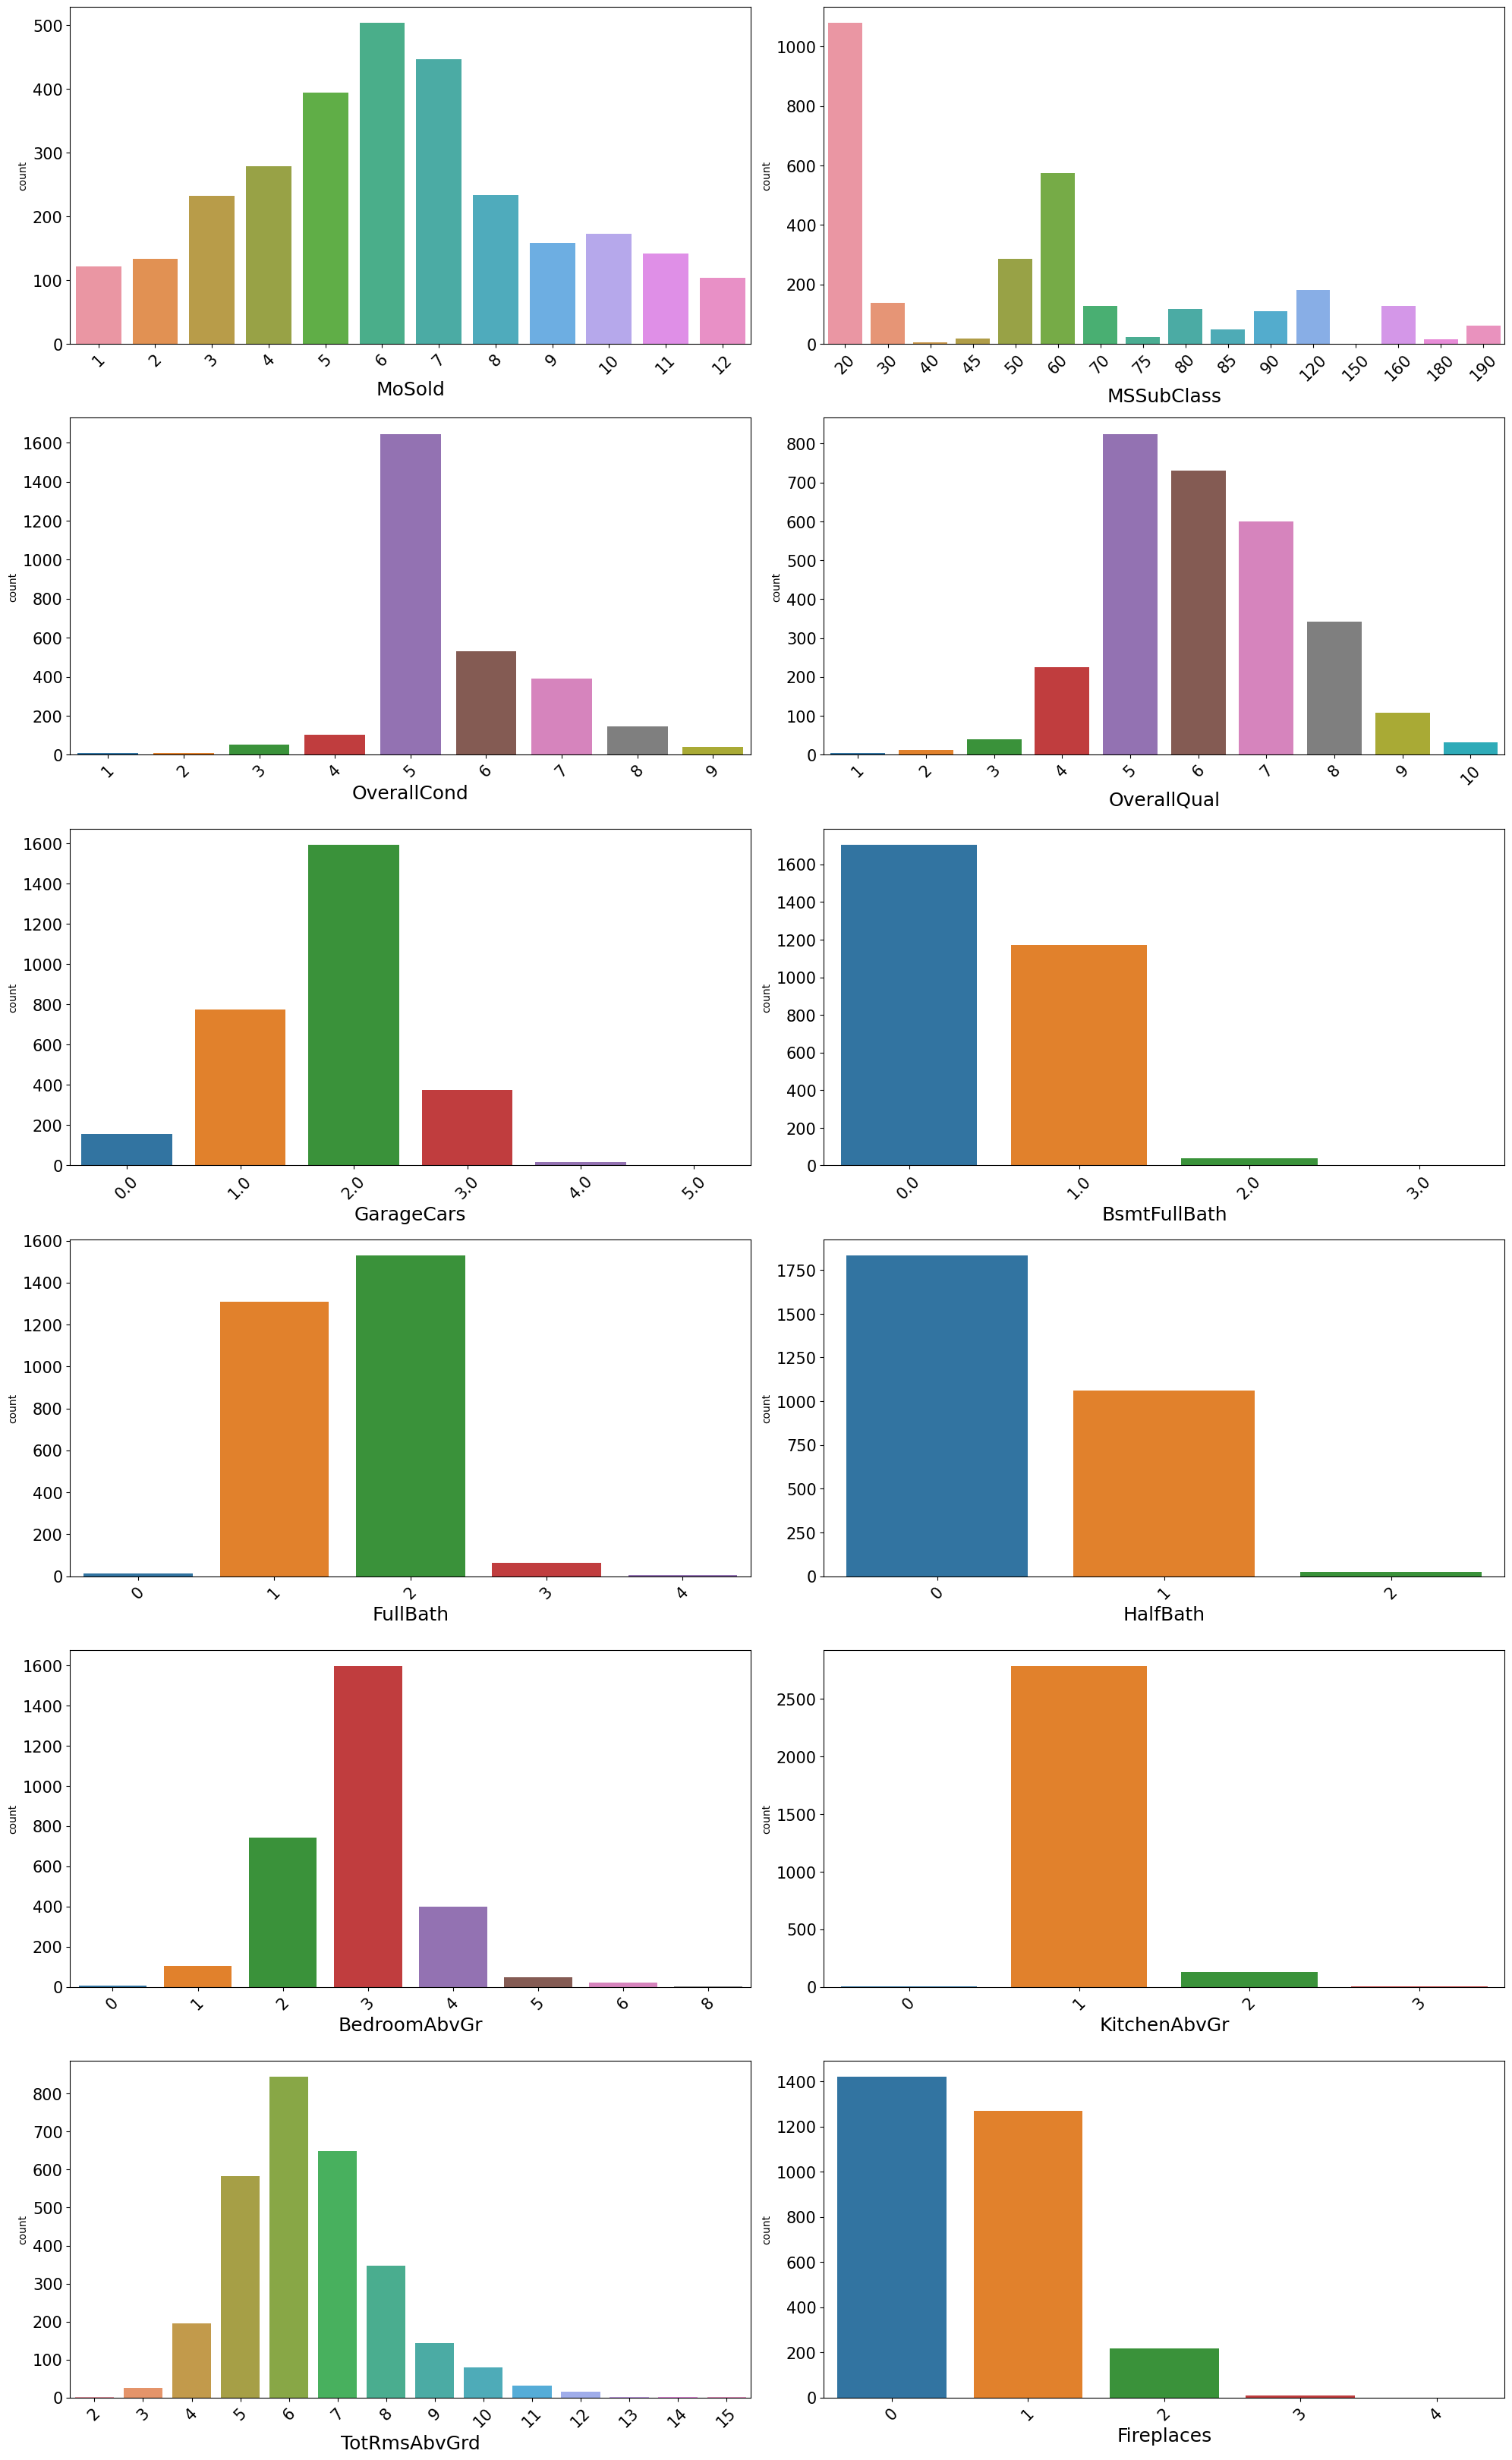

In [ ]:
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_but_cat.columns):
    plt.subplot(26,2,index+1)
    sns.countplot(x=num_but_cat.iloc[:,index], data=num_but_cat.dropna())
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

In [ ]:
#Creating new features
# Define a lambda function to map each month to its corresponding season
season_map = lambda x: "Winter" if x in [12, 1, 2] else \
                       "Spring" if x in [3, 4, 5] else \
                       "Summer" if x in [6, 7, 8] else \
                       "Fall" if x in [9, 10, 11] else None

# Apply the lambda function to create a new "season" column based on the "MoSold" column
train["sold_season"] = train["MoSold"].apply(season_map)

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0   1          60       RL         65.0     8450  Absence      Reg   
1   2          20       RL         80.0     9600  Absence      Reg   
2   3          60       RL         68.0    11250  Absence      IR1   
3   4          70       RL         60.0     9550  Absence      IR1   
4   5          60       RL         84.0    14260  Absence      IR1   

  LandContour      LotConfig   Neighborhood  ... MoSold YrSold SaleType  \
0         Lvl         Inside        CollgCr  ...      2   2008       WD   
1         Lvl  rare_category  rare_category  ...      5   2007       WD   
2         Lvl         Inside        CollgCr  ...      9   2008       WD   
3         Lvl         Corner  rare_category  ...      2   2006       WD   
4         Lvl  rare_category  rare_category  ...     12   2008       WD   

   SaleCondition  SalePrice  Fence_  Fireplace_ Garage_ Alley_ sold_season  
0         Normal   208500.0      No          No     Yes     No      Winter  
1         Normal   181500.0      No         Yes     Yes     No      Spring  
2         Normal   223500.0      No         Yes     Yes     No        Fall  
3        Abnorml   140000.0      No         Yes     Yes     No      Winter  
4         Normal   250000.0      No         Yes     Yes     No      Winter  

[5 rows x 72 columns]

### 2.1.D. Time Features

In [ ]:
#validating date data
year_data = train[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']]
year_data.agg(['min','max'])

GarageYrBlt  YearBuilt  YearRemodAdd  YrSold
min       1895.0       1872          1950    2006
max       2207.0       2010          2010    2010

In [ ]:
#There are 9 observations that year garage was built earlier than original construction date. Is it possible?
check = train[train['GarageYrBlt'] < train['YearBuilt']]
check['GarageYrBlt'] = check['GarageYrBlt'].astype('int')
check[['GarageYrBlt', 'YearBuilt']]

<ipython-input-59-ef4ab3b0e552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['GarageYrBlt'] = check['GarageYrBlt'].astype('int')


GarageYrBlt  YearBuilt
29           1920       1927
93           1900       1910
324          1961       1967
600          2003       2005
736          1949       1950
1103         1954       1959
1376         1925       1930
1414         1922       1923
1418         1962       1963
61           1956       1959
116          2009       2010
345          1920       1935
380          1960       1978
435          1940       1941
437          1926       1935
662          1925       1945
803          2005       2006
1049         2005       2006

In [ ]:
##inconsistency
check_2 = train[train['YearRemodAdd'] < train['YearBuilt']]
check_2[['YearRemodAdd', 'YearBuilt']]

YearRemodAdd  YearBuilt
416          2001       2002

In [ ]:
#removed the inconsistency row
train = train.drop(416)

In [ ]:
#check again
check_2 = train[train['YearRemodAdd'] < train['YearBuilt']]
check_2[['YearRemodAdd', 'YearBuilt']]

Empty DataFrame
Columns: [YearRemodAdd, YearBuilt]
Index: []

In [ ]:
#inconsistency
check_3 = train[train['YrSold'] < train['YearBuilt']]
check_3[['YrSold', 'YearBuilt']]

YrSold  YearBuilt
1089    2007       2008

In [ ]:
#removed the inconsistence row
train = train.drop(1089)

In [ ]:
#ok
check_3 = train[train['YrSold'] < train['YearBuilt']]
check_3[['YrSold', 'YearBuilt']]

Empty DataFrame
Columns: [YrSold, YearBuilt]
Index: []

In [ ]:
#inconsistency
check_4 = train[train['GarageYrBlt'] > 2023]
check_4[['GarageYrBlt','YearRemodAdd', 'YearBuilt']]

GarageYrBlt  YearRemodAdd  YearBuilt
1132       2207.0          2007       2006

In [ ]:
#removed the inconsistence row
train = train.drop(1132)

In [ ]:
#ok
check_4 = train[train['GarageYrBlt'] > 2023]
check_4[['GarageYrBlt','YearRemodAdd', 'YearBuilt']]

Empty DataFrame
Columns: [GarageYrBlt, YearRemodAdd, YearBuilt]
Index: []

In [ ]:
#it seems that years are same as construction date if no remodeling or additions. Thats why we have decided to remove YearBuilt column.
check_4 = train[train['YearRemodAdd'] == train['YearBuilt']]
check_4[['YearRemodAdd', 'YearBuilt']]

YearRemodAdd  YearBuilt
0             2003       2003
1             1976       1976
4             2000       2000
7             1973       1973
10            1965       1965
...            ...        ...
1452          1970       1970
1453          1970       1970
1454          1970       1970
1455          1970       1970
1457          1992       1992

[1558 rows x 2 columns]

In [ ]:
#We have changed the year columns to age by extracting from today(year).
import datetime

today = datetime.date.today()

year = today.year

print(year)

2023


In [ ]:
train['AgeBuilt'] = year - train['YearRemodAdd']

print(train['AgeBuilt'].head())


0    20
1    47
2    21
3    53
4    23
Name: AgeBuilt, dtype: int64


In [ ]:
train['AgeSale'] = year - train['YrSold']

print(train['AgeSale'].head())


0    15
1    16
2    15
3    17
4    15
Name: AgeSale, dtype: int64


In [ ]:
#We have changed the missing values with 2023 due to missing values mean that there is no garage before we calculate the age of the garage. (We want to set 0 age of garage.)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('2023')

print(train['GarageYrBlt'].isnull().sum())


0


In [ ]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)


In [ ]:
train['AgeGarage'] = year - train['GarageYrBlt']


print(train['AgeGarage'].head())

0    20
1    47
2    22
3    25
4    23
Name: AgeGarage, dtype: int64


In [ ]:
#removed the all year columns. (except YrSold due to there is possible to combine with month column)
train = train.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt','YrSold'], axis=1)

print(train.shape)


(2913, 71)


## 2.2 Correlation Analysis

In [ ]:
train.corr()

<ipython-input-77-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.010177    -0.028899 -0.042694    -0.031661   
MSSubClass     0.010177    1.000000    -0.417000 -0.200881     0.034486   
LotFrontage   -0.028899   -0.417000     1.000000  0.487745     0.216613   
LotArea       -0.042694   -0.200881     0.487745  1.000000     0.097962   
OverallQual   -0.031661    0.034486     0.216613  0.097962     1.000000   
OverallCond   -0.002015   -0.065812    -0.075122 -0.035156    -0.093045   
MasVnrArea    -0.028122    0.007658     0.216606  0.118634     0.430985   
BsmtFinSF1    -0.021286   -0.062665     0.216027  0.187066     0.276955   
BsmtFinSF2     0.018378   -0.072671     0.047760  0.084511    -0.042256   
BsmtUnfSF     -0.015361   -0.125522     0.111996  0.019765     0.274983   
TotalBsmtSF   -0.030455   -0.220302     0.352729  0.246962     0.548982   
1stFlrSF      -0.014483   -0.249880     0.458794  0.326433     0.478380   
2ndFlrSF      -0.020966    0.309369     0.026232  0.032455     0.248054   
GrLivArea     -0.032534    0.074657     0.379178  0.278607     0.574969   
BsmtFullBath  -0.000437    0.009926     0.113493  0.127548     0.163596   
FullBath      -0.011290    0.140524     0.180640  0.124890     0.529159   
HalfBath      -0.014850    0.178424     0.039072  0.033243     0.272296   
BedroomAbvGr   0.004082   -0.008527     0.234821  0.134068     0.075966   
KitchenAbvGr  -0.011638    0.260316     0.004859 -0.020741    -0.159226   
TotRmsAbvGrd  -0.032041    0.042943     0.345659  0.208118     0.388527   
Fireplaces    -0.036176   -0.054940     0.261157  0.259733     0.389602   
GarageCars    -0.011096   -0.046054     0.310300  0.179081     0.600463   
GarageArea    -0.010620   -0.102601     0.358798  0.210279     0.564044   
WoodDeckSF    -0.009404   -0.015958     0.118729  0.154003     0.253149   
OpenPorchSF    0.007284   -0.014610     0.160311  0.097622     0.294798   
EnclosedPorch  0.021764   -0.020982     0.011833  0.021318    -0.138814   
MoSold         0.004821   -0.000264     0.009616  0.002134     0.029215   
SalePrice     -0.017945   -0.086731     0.359705  0.268144     0.802074   
AgeBuilt       0.051908   -0.043996    -0.091909 -0.020504    -0.571059   
AgeSale        0.257019    0.014355     0.007709  0.024177     0.018426   
AgeGarage      0.029687   -0.122809    -0.030736  0.037087    -0.410106   

               OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id               -0.002015   -0.028122   -0.021286    0.018378  -0.015361   
MSSubClass       -0.065812    0.007658   -0.062665   -0.072671  -0.125522   
LotFrontage      -0.075122    0.216606    0.216027    0.047760   0.111996   
LotArea          -0.035156    0.118634    0.187066    0.084511   0.019765   
OverallQual      -0.093045    0.430985    0.276955   -0.042256   0.274983   
OverallCond       1.000000   -0.136616   -0.049316    0.041322  -0.137763   
MasVnrArea       -0.136616    1.000000    0.292271   -0.015194   0.088278   
BsmtFinSF1       -0.049316    0.292271    1.000000   -0.054704  -0.485555   
BsmtFinSF2        0.041322   -0.015194   -0.054704    1.000000  -0.238335   
BsmtUnfSF        -0.137763    0.088278   -0.485555   -0.238335   1.000000   
TotalBsmtSF      -0.174413    0.386116    0.524714    0.091871   0.415114   
1stFlrSF         -0.157712    0.383987    0.443328    0.086987   0.297933   
2ndFlrSF          0.005335    0.123616   -0.160608   -0.097913  -0.000760   
GrLivArea        -0.115798    0.394185    0.197373   -0.017243   0.232670   
BsmtFullBath     -0.041814    0.140624    0.642540    0.163085  -0.398719   
FullBath         -0.214784    0.260263    0.080404   -0.075389   0.272682   
HalfBath         -0.089488    0.190589   -0.010803   -0.032342  -0.035670   
BedroomAbvGr     -0.008053    0.081176   -0.110371   -0.031444   0.183143   
KitchenAbvGr     -0.086926   -0.051354   -0.086671   -0.037910   0.065130   
TotRmsAbvGrd     -0.091445    0.269812    0.039378   -0.048301   0.246095   
Fir

<ipython-input-78-6382cdf84f25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(train.corr(), cmap='Greens', annot=True)


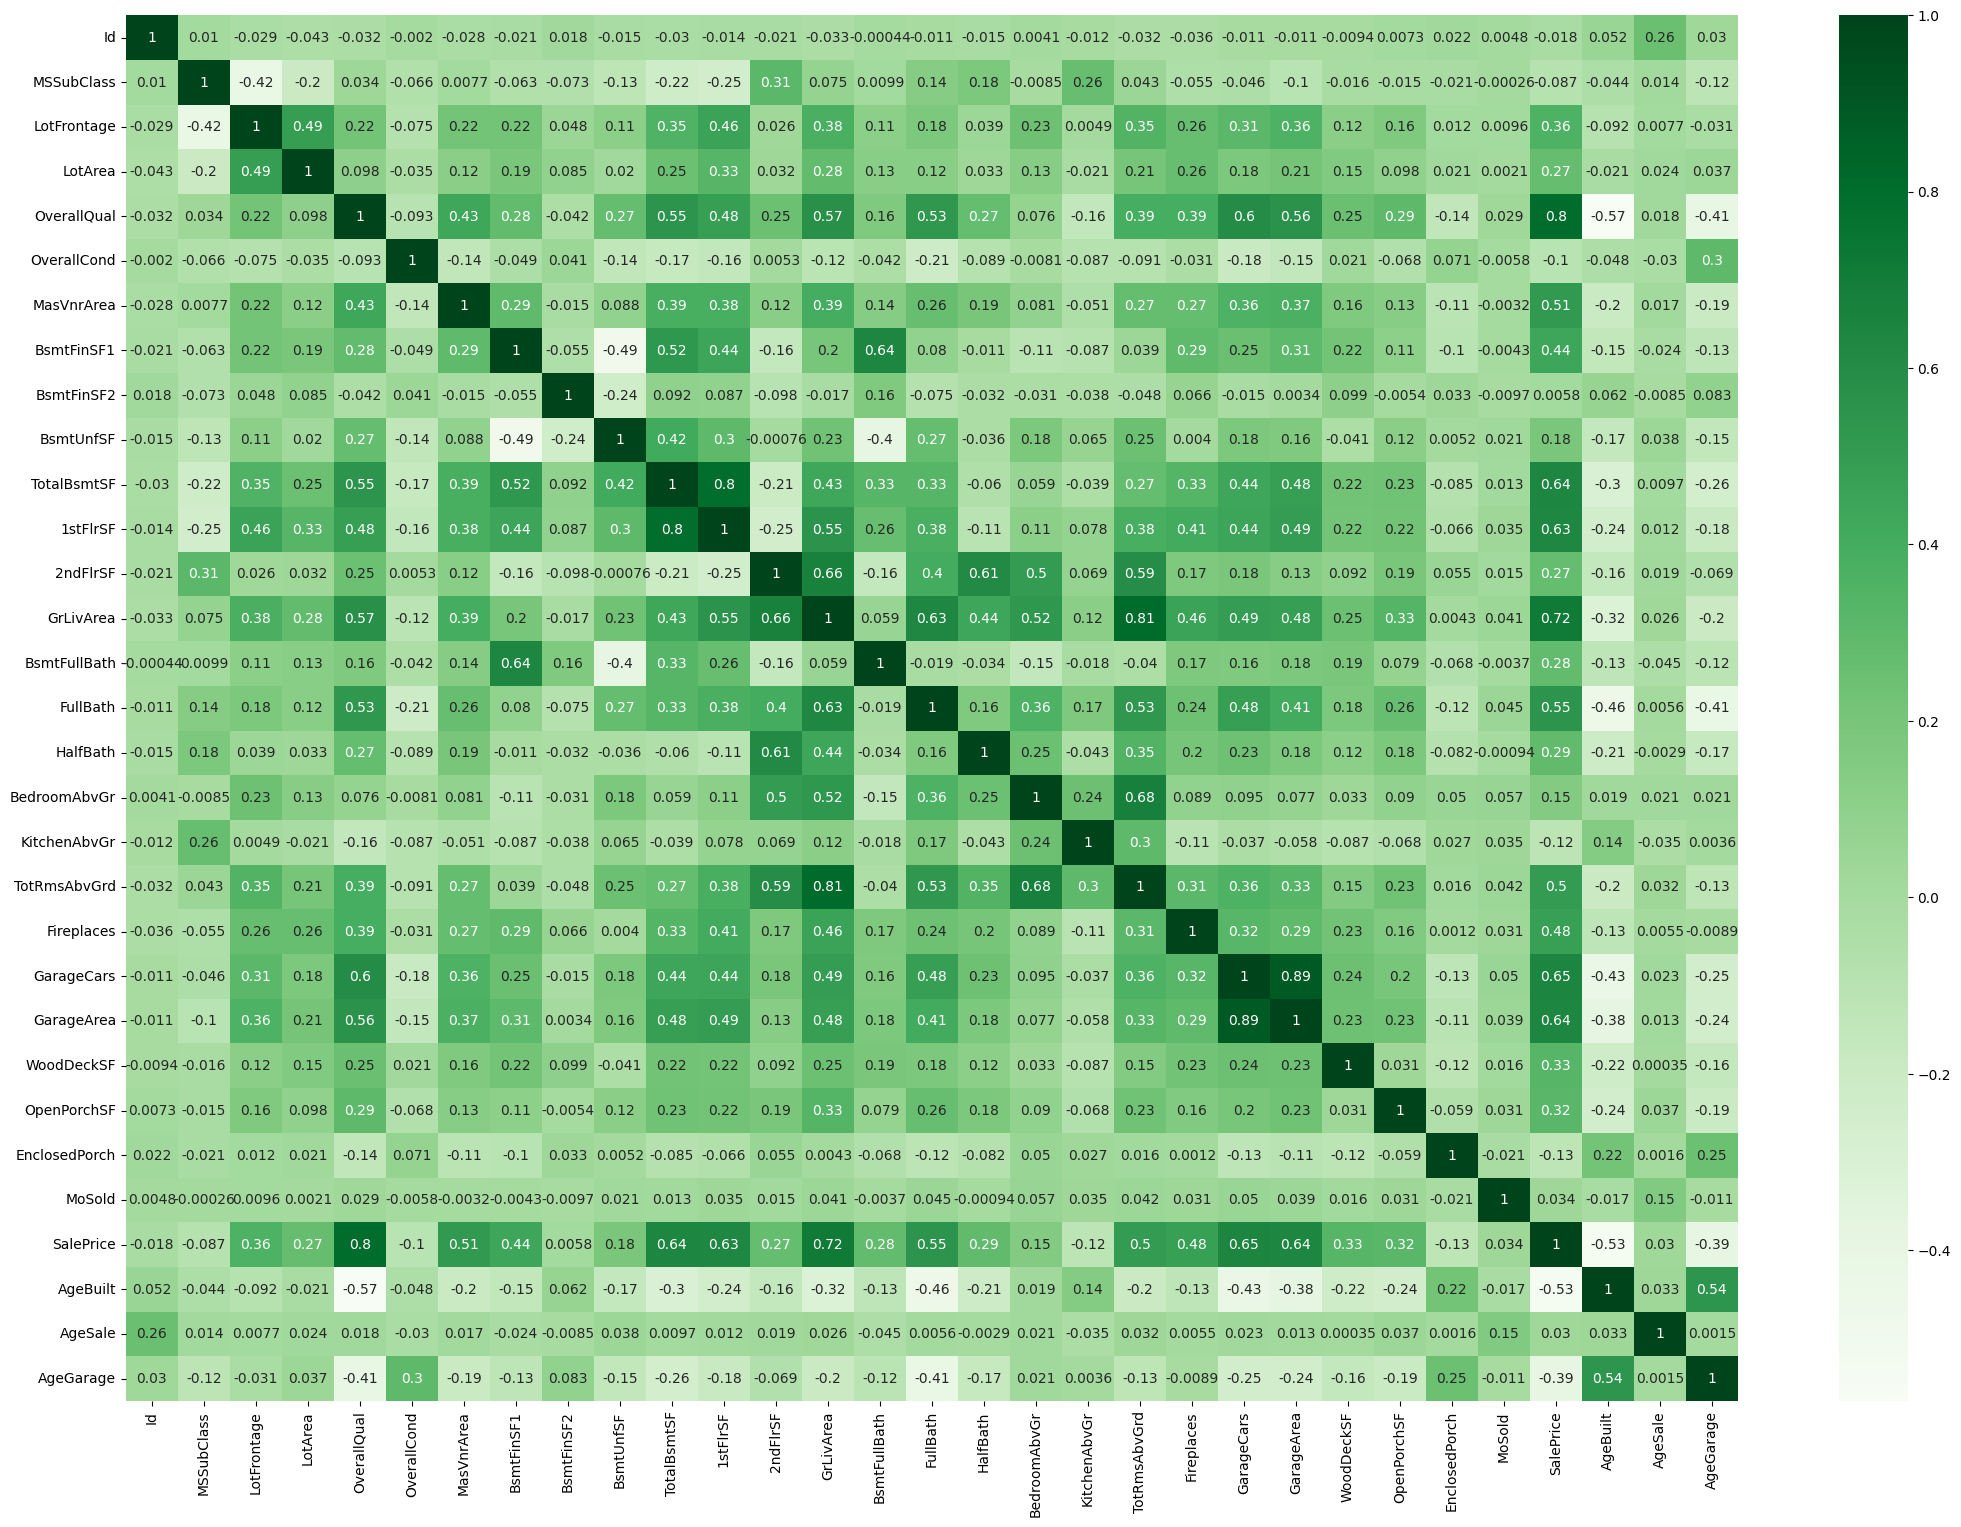

In [ ]:
#checked correlations
plt.figure(figsize=(26,18))
ax=sns.heatmap(train.corr(), cmap='Greens', annot=True)
plt.show()

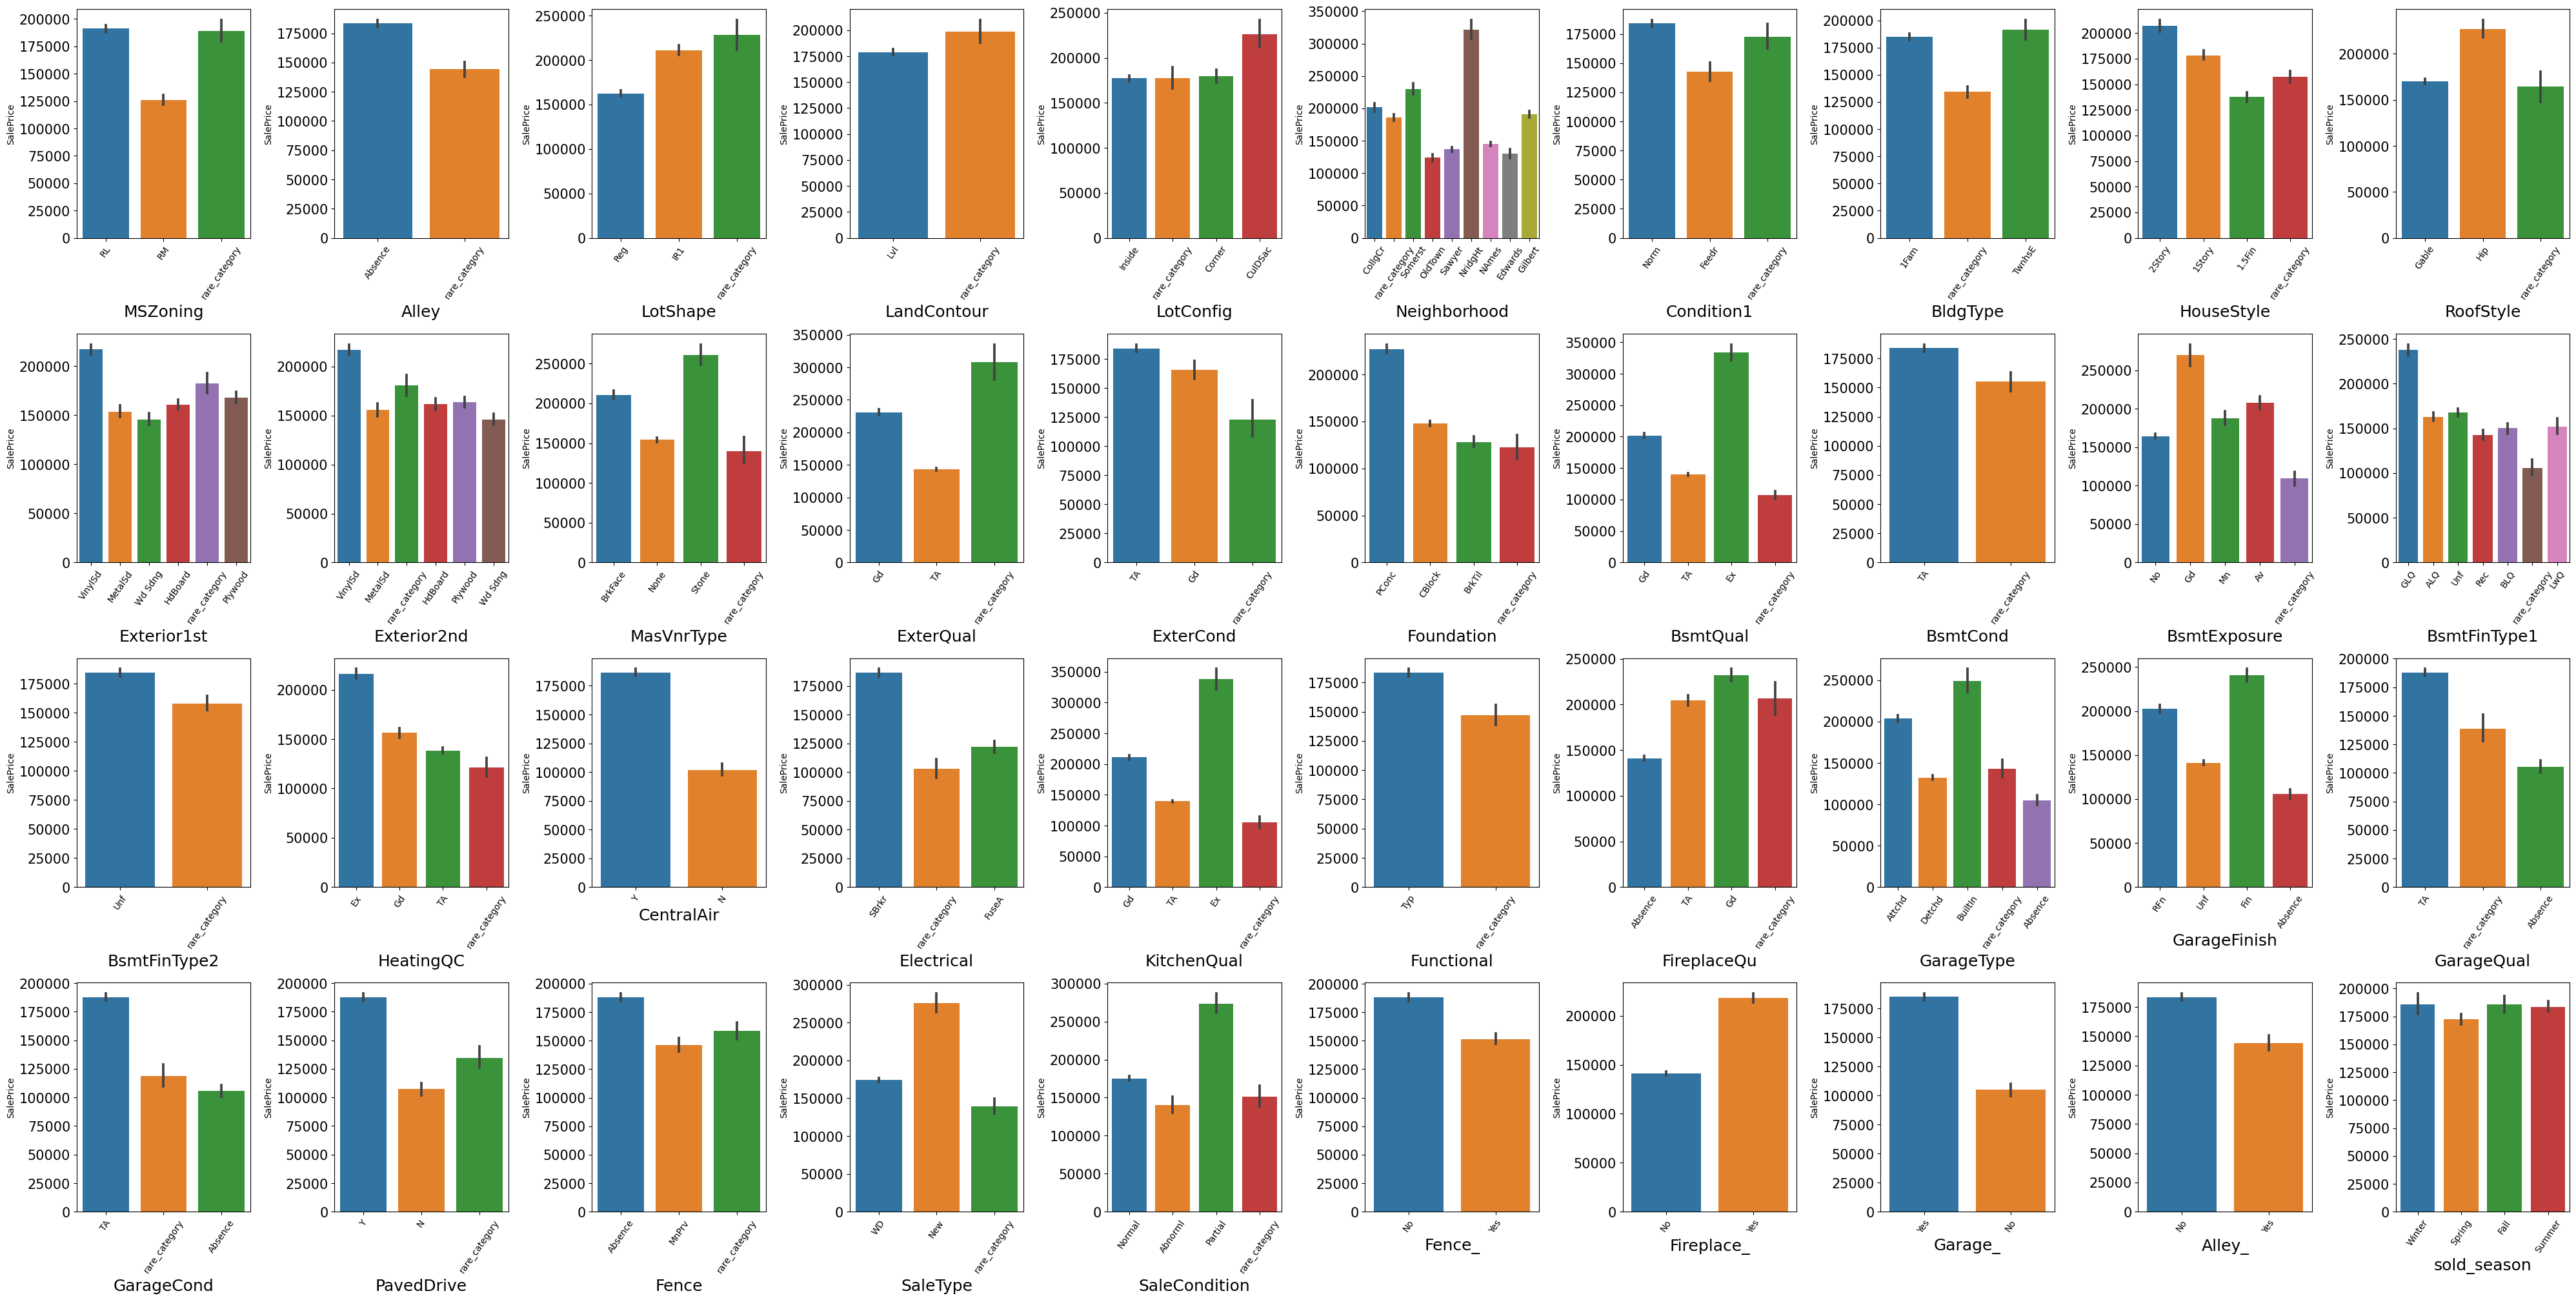

In [ ]:
#Analysis of relationship between categorical variables and target variable
cat_3 = train.select_dtypes(include='object')
num_cols = cat_3.shape[1]  # get number of columns in cat_3

fig = plt.figure(figsize=(40, 5*num_cols))
for index,col in enumerate(cat_3.columns):
    plt.subplot(num_cols, 10, index+1)
    sns.barplot(x=cat_3[col], y=train['SalePrice'])
    plt.xlabel(col, fontsize=18, color="black")
    plt.xticks(size=10, color="black", rotation=55)
    plt.yticks(size=15, color="black")

fig.tight_layout(pad=1.0)

## 2.3 Feature Engineering

#### 2.3.A Missing Values

In [ ]:
#checked missing values
null = pd.DataFrame(train.isnull().sum())
null = null.reset_index()
null = null.rename(columns={'index': 'Variables', 0:'Count'})
null['Proportion'] = null['Count']/len(train)
#checked only columns with null values
null_col = null[null['Count']>0].sort_values('Proportion', ascending=False)
null_col = null_col['Variables'].values

In [ ]:
null[null['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
3    LotFrontage    486    0.166838
18    MasVnrType     23    0.007896
19    MasVnrArea     22    0.007552
2       MSZoning      4    0.001373
45    Functional      2    0.000687
38  BsmtFullBath      2    0.000687
34    Electrical      1    0.000343
51    GarageArea      1    0.000343
50    GarageCars      1    0.000343
43   KitchenQual      1    0.000343
30     BsmtUnfSF      1    0.000343
31   TotalBsmtSF      1    0.000343
29    BsmtFinSF2      1    0.000343
27    BsmtFinSF1      1    0.000343
17   Exterior2nd      1    0.000343
16   Exterior1st      1    0.000343
60      SaleType      1    0.000343

In [ ]:

train[null_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2427 non-null   float64
 1   MasVnrType    2890 non-null   object 
 2   MasVnrArea    2891 non-null   float64
 3   MSZoning      2909 non-null   object 
 4   Functional    2911 non-null   object 
 5   BsmtFullBath  2911 non-null   float64
 6   Electrical    2912 non-null   object 
 7   GarageArea    2912 non-null   float64
 8   GarageCars    2912 non-null   float64
 9   KitchenQual   2912 non-null   object 
 10  BsmtUnfSF     2912 non-null   float64
 11  TotalBsmtSF   2912 non-null   float64
 12  BsmtFinSF2    2912 non-null   float64
 13  BsmtFinSF1    2912 non-null   float64
 14  Exterior2nd   2912 non-null   object 
 15  Exterior1st   2912 non-null   object 
 16  SaleType      2912 non-null   object 
dtypes: float64(9), object(8)
memory usage: 409.6+ KB


<Figure size 1000x600 with 0 Axes>

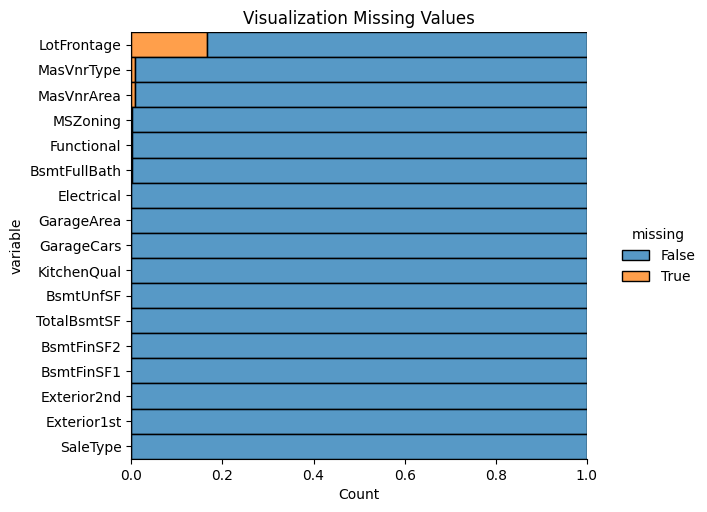

In [ ]:
#first alternative categorical variables with null values
plt.figure(figsize=(10,6))
sns.displot(
    data=train[null_col].isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.title('Visualization Missing Values')
plt.show()

<Axes: >

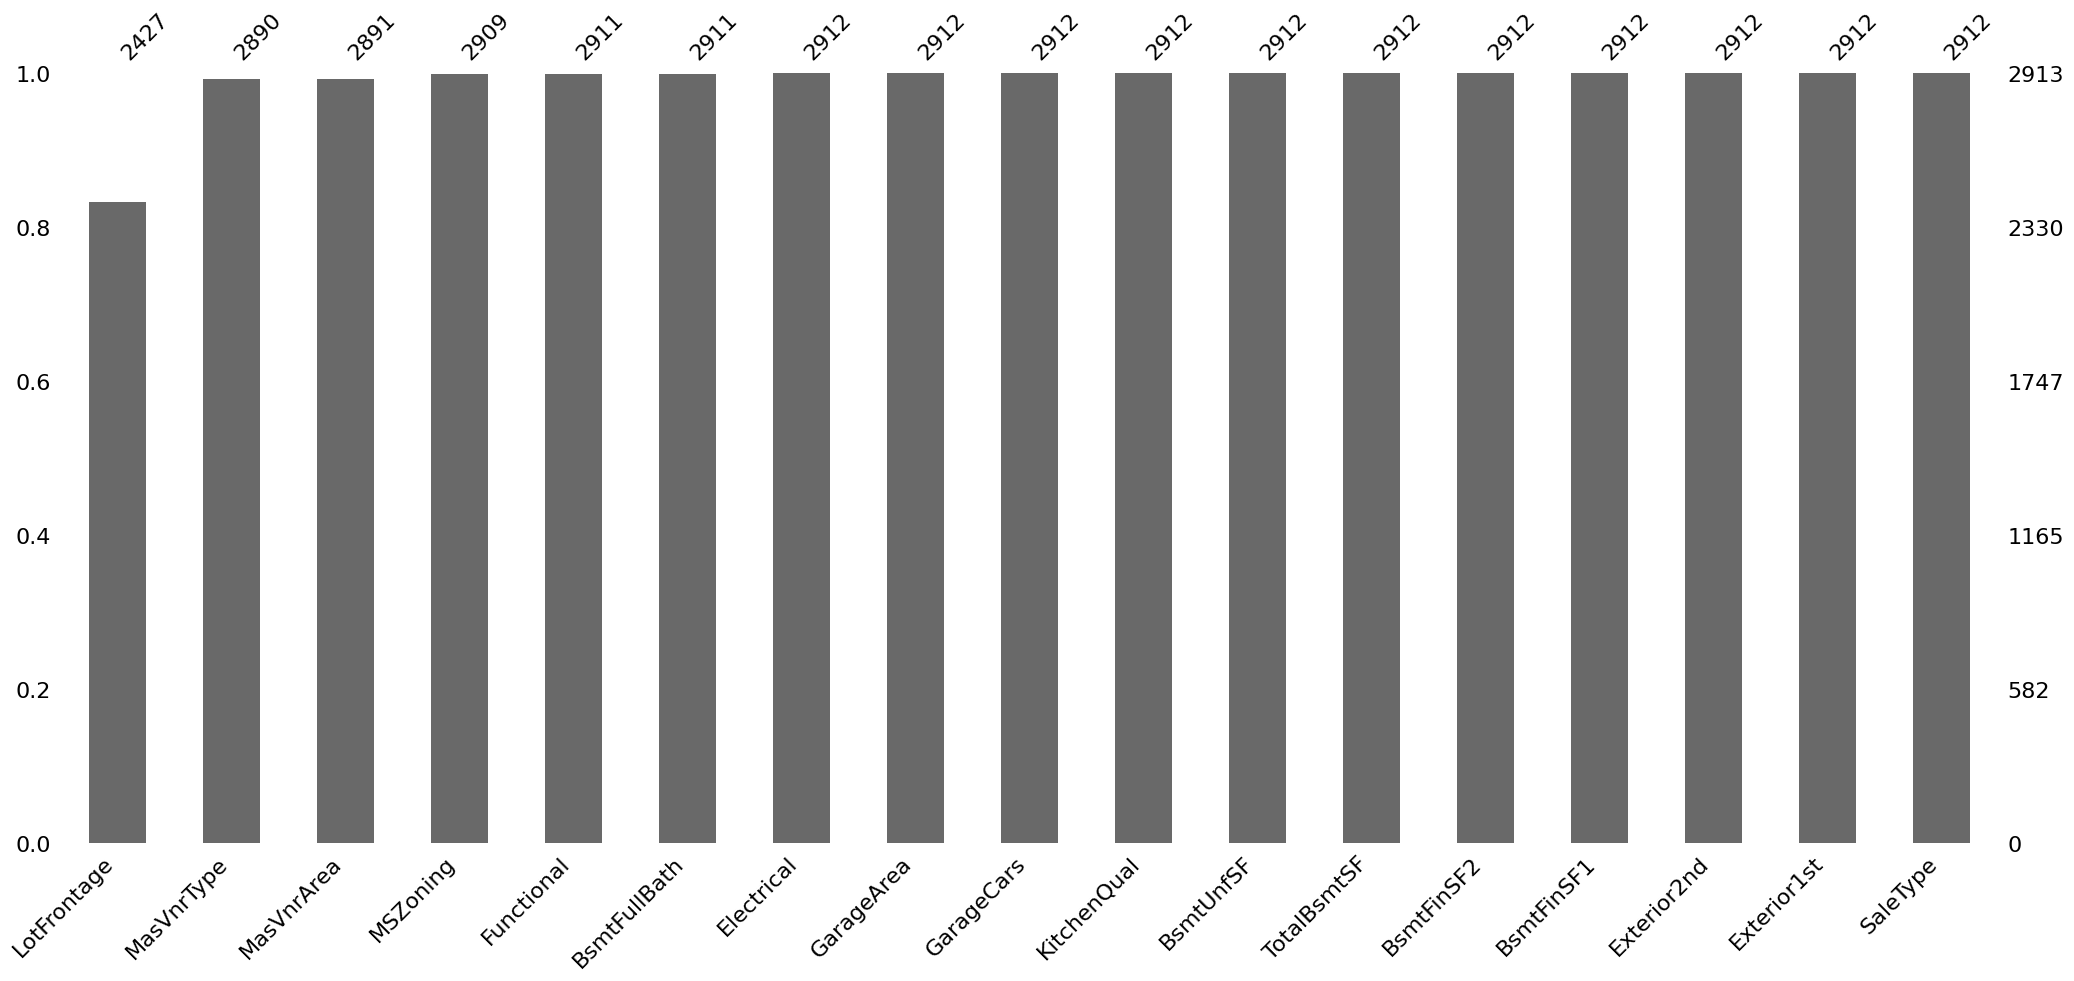

In [ ]:
import missingno as msno
#Second alternative categorical variables with null values
msno.bar(train[null_col])

<Axes: >

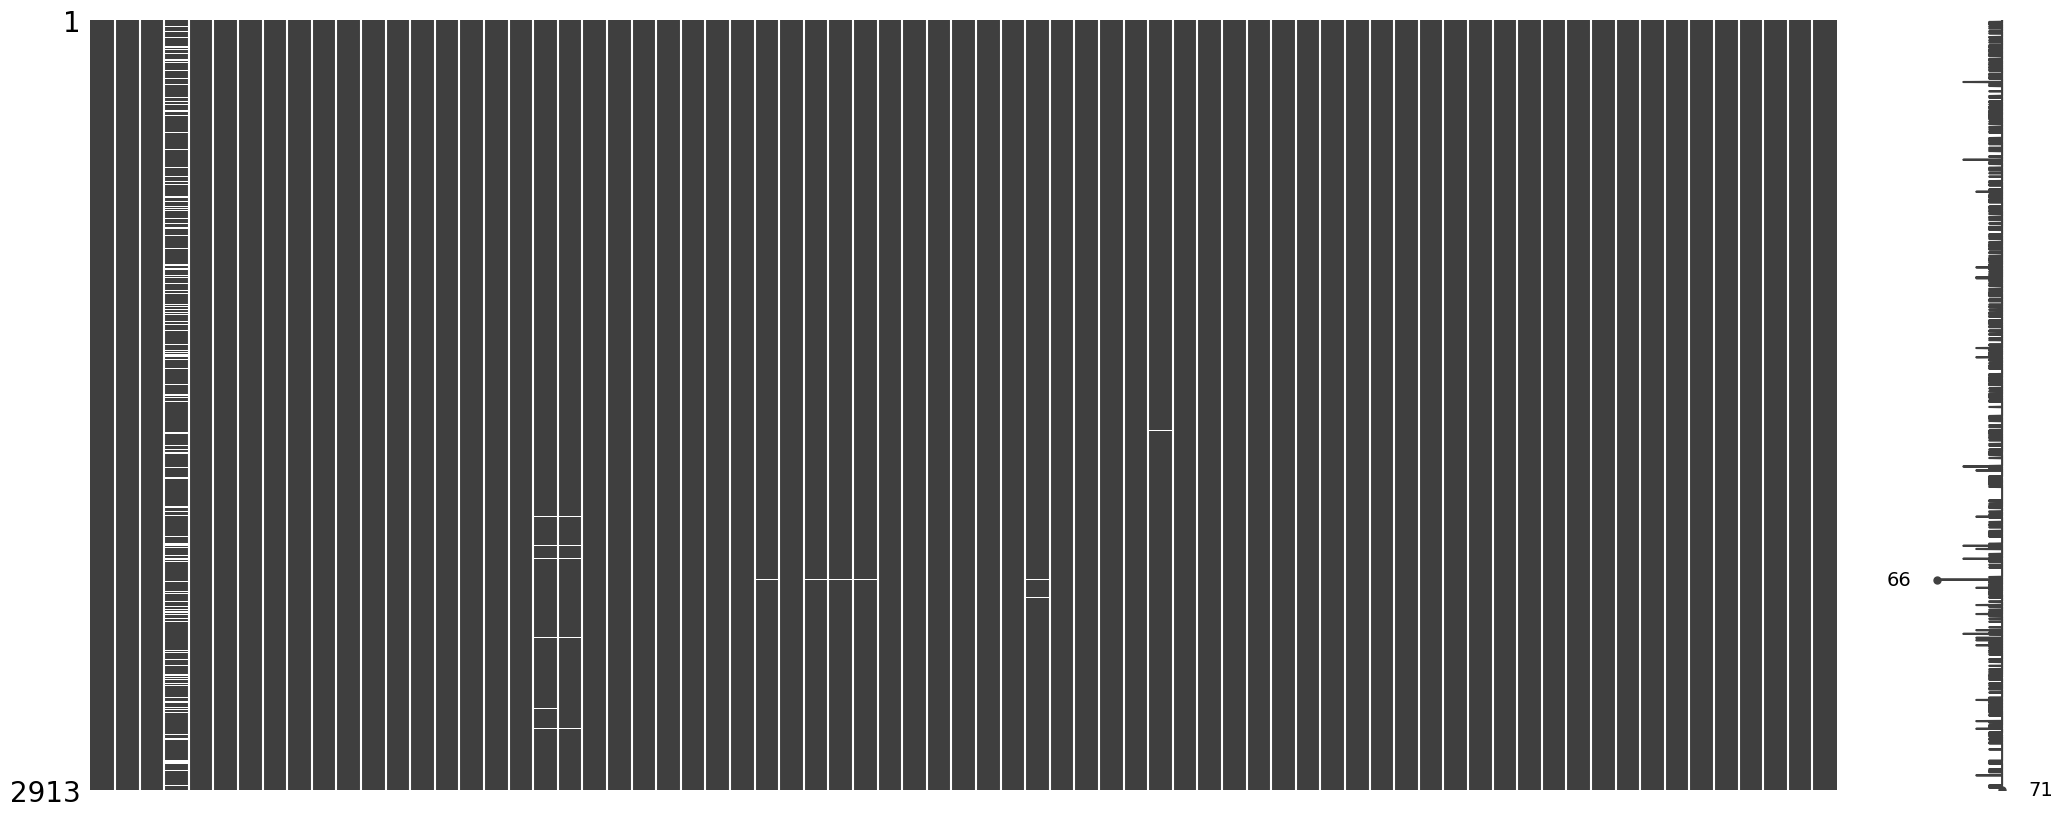

In [ ]:
#checked whether missing values are at random.
msno.matrix(train)

<Axes: >

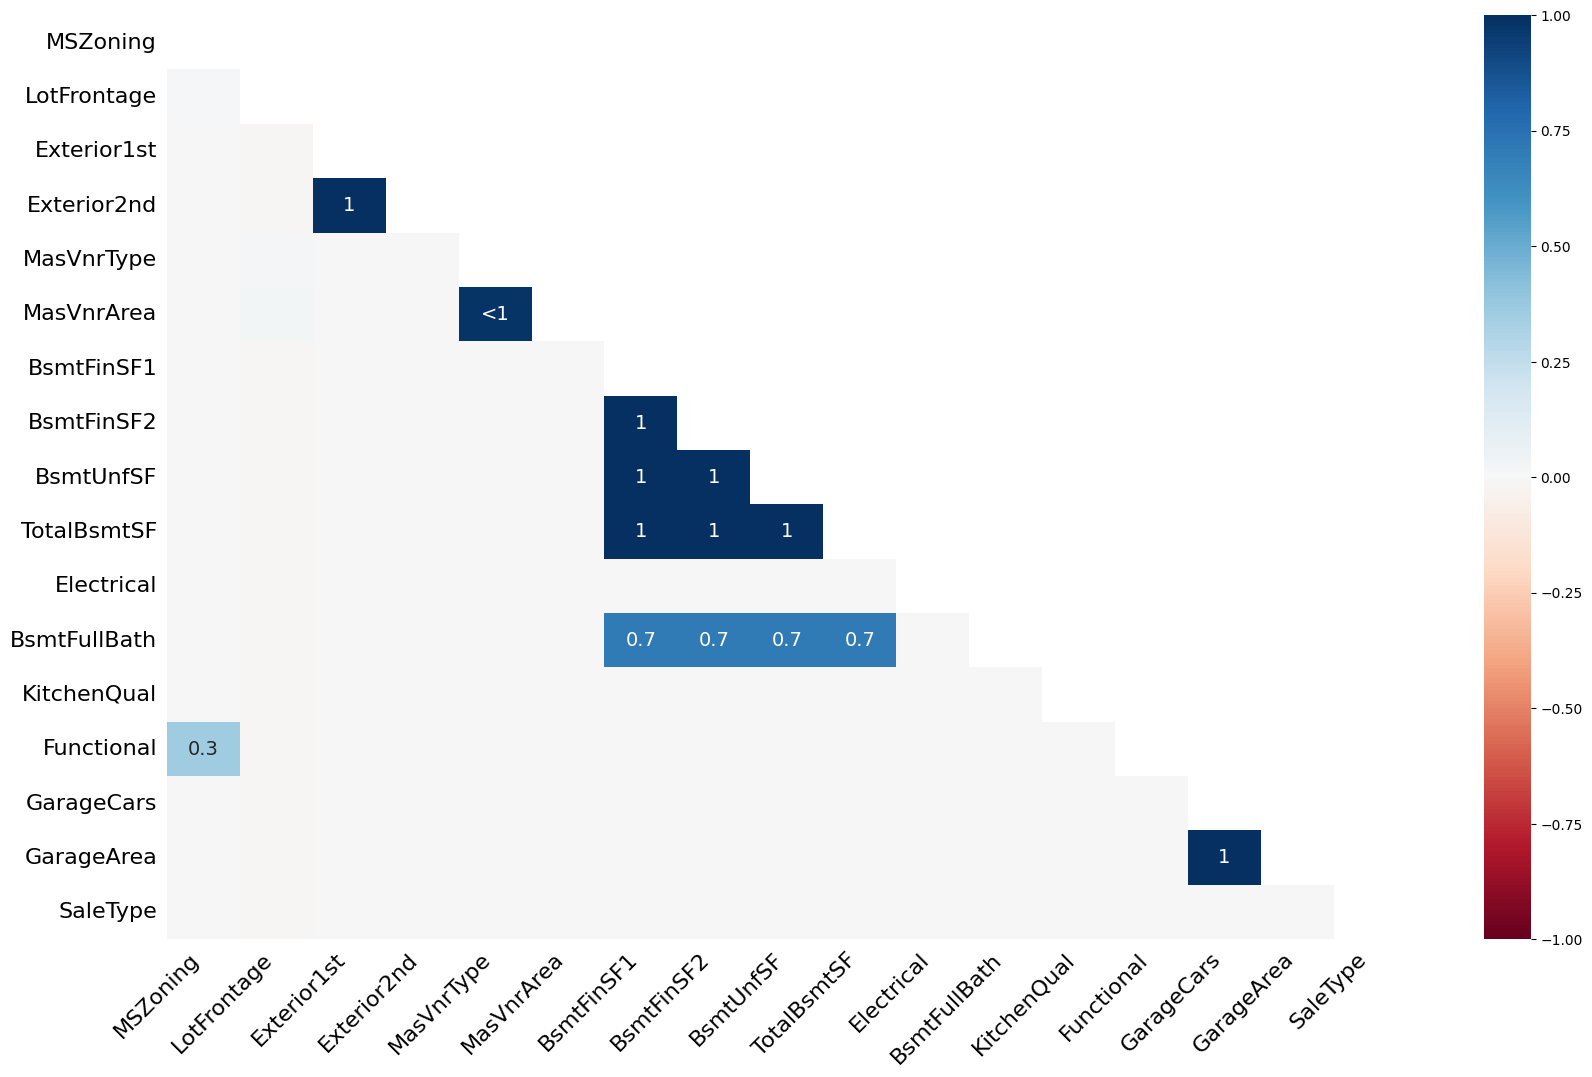

In [ ]:
#Third alternative - shown graph of correlation of missing values between columns and explains the dependencies of missingness between columns
#https://medium.com/codex/how-to-identify-and-visualize-missing-values-with-python-3b304b06fe21
#the redder the color, the lower the correlation between missing values of the columns. The bluer it is, the higher the correlation of missingness.
#Close to -1: there is an anti-correlation between 2 columns: if column A has values, then column B has null values.
#Close to 0: no correlation due to the presence of null values between the columns
#Close to 1: strong correlation due to the presence of null values between the columns
msno.heatmap(train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'MasVnrArea'),
  Text(2, 0, 'BsmtFullBath'),
  Text(3, 0, 'GarageArea'),
  Text(4, 0, 'GarageCars'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, 'BsmtFinSF2'),
  Text(8, 0, 'BsmtFinSF1')])

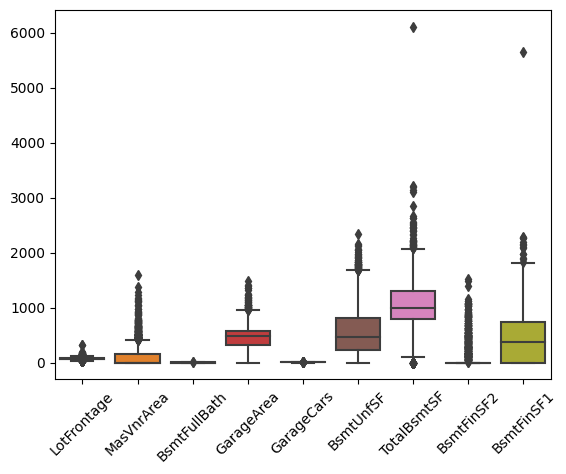

In [ ]:
sns.boxplot(train[null_col])
plt.xticks(rotation=45)

In [ ]:
train[null_col]

LotFrontage MasVnrType  MasVnrArea MSZoning Functional  BsmtFullBath  \
0            65.0    BrkFace       196.0       RL        Typ           1.0   
1            80.0       None         0.0       RL        Typ           0.0   
2            68.0    BrkFace       162.0       RL        Typ           1.0   
3            60.0       None         0.0       RL        Typ           1.0   
4            84.0    BrkFace       350.0       RL        Typ           1.0   
...           ...        ...         ...      ...        ...           ...   
1454         21.0       None         0.0       RM        Typ           0.0   
1455         21.0       None         0.0       RM        Typ           0.0   
1456        160.0       None         0.0       RL        Typ           1.0   
1457         62.0       None         0.0       RL        Typ           0.0   
1458         74.0    BrkFace        94.0       RL        Typ           0.0   

     Electrical  GarageArea  GarageCars KitchenQual  BsmtUnfSF  TotalBsmtSF  \
0         SBrkr       548.0         2.0          Gd      150.0        856.0   
1         SBrkr       460.0         2.0          TA      284.0       1262.0   
2         SBrkr       608.0         2.0          Gd      434.0        920.0   
3         SBrkr       642.0         3.0          Gd      540.0        756.0   
4         SBrkr       836.0         3.0          Gd      490.0       1145.0   
...         ...         ...         ...         ...        ...          ...   
1454      SBrkr         0.0         0.0          TA      546.0        546.0   
1455      SBrkr       286.0         1.0          TA      294.0        546.0   
1456      SBrkr       576.0         2.0          TA        0.0       1224.0   
1457      SBrkr         0.0         0.0          TA      575.0        912.0   
1458      SBrkr       650.0         3.0          TA      238.0        996.0   

      BsmtFinSF2  BsmtFinSF1    Exterior2nd    Exterior1st SaleType  
0            0.0       706.0        VinylSd        VinylSd       WD  
1            0.0       978.0        MetalSd        MetalSd       WD  
2            0.0       486.0        VinylSd        VinylSd       WD  
3            0.0       216.0  rare_category        Wd Sdng       WD  
4            0.0       655.0        VinylSd        VinylSd       WD  
...          ...         ...            ...            ...      ...  
1454         0.0         0.0  rare_category  rare_category       WD  
1455         0.0       252.0  rare_category  rare_category       WD  
1456         0.0      1224.0        VinylSd        VinylSd       WD  
1457         0.0       337.0  rare_category        HdBoard       WD  
1458         0.0       758.0        HdBoard        HdBoard       WD  

[2913 rows x 17 columns]

In [ ]:
train[null_col].describe().T

count         mean         std   min    25%    50%      75%  \
LotFrontage   2427.0    69.286774   23.329978  21.0   59.0   68.0    80.00   
MasVnrArea    2891.0   101.860948  178.240588   0.0    0.0    0.0   164.00   
BsmtFullBath  2911.0     0.429749    0.524776   0.0    0.0    0.0     1.00   
GarageArea    2912.0   472.671703  215.174485   0.0  320.0  480.0   576.00   
GarageCars    2912.0     1.766140    0.761884   0.0    1.0    2.0     2.00   
BsmtUnfSF     2912.0   560.588599  439.636391   0.0  220.0  467.0   803.25   
TotalBsmtSF   2912.0  1050.167582  434.580608   0.0  793.0  988.0  1302.00   
BsmtFinSF2    2912.0    49.684409  169.364911   0.0    0.0    0.0     0.00   
BsmtFinSF1    2912.0   439.894574  450.763099   0.0    0.0  368.0   733.00   

                 max  
LotFrontage    313.0  
MasVnrArea    1600.0  
BsmtFullBath     3.0  
GarageArea    1488.0  
GarageCars       5.0  
BsmtUnfSF     2336.0  
TotalBsmtSF   6110.0  
BsmtFinSF2    1526.0  
BsmtFinSF1    5644.0

In [ ]:
train[null_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2427 non-null   float64
 1   MasVnrType    2890 non-null   object 
 2   MasVnrArea    2891 non-null   float64
 3   MSZoning      2909 non-null   object 
 4   Functional    2911 non-null   object 
 5   BsmtFullBath  2911 non-null   float64
 6   Electrical    2912 non-null   object 
 7   GarageArea    2912 non-null   float64
 8   GarageCars    2912 non-null   float64
 9   KitchenQual   2912 non-null   object 
 10  BsmtUnfSF     2912 non-null   float64
 11  TotalBsmtSF   2912 non-null   float64
 12  BsmtFinSF2    2912 non-null   float64
 13  BsmtFinSF1    2912 non-null   float64
 14  Exterior2nd   2912 non-null   object 
 15  Exterior1st   2912 non-null   object 
 16  SaleType      2912 non-null   object 
dtypes: float64(9), object(8)
memory usage: 409.6+ KB


In [ ]:
from sklearn.impute import SimpleImputer

# Get the list of numeric and categorical columns
num_cols = train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# Impute the median for numeric columns and mode for categorical columns
imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

train[num_cols] = imp_num.fit_transform(train[num_cols])
train[cat_cols] = imp_cat.fit_transform(train[cat_cols])


In [ ]:
train[null_col].describe().T

count         mean         std   min    25%    50%     75%  \
LotFrontage   2913.0    69.072091   21.299739  21.0   60.0   68.0    78.0   
MasVnrArea    2913.0   101.091658  177.784939   0.0    0.0    0.0   163.0   
BsmtFullBath  2913.0     0.429454    0.524716   0.0    0.0    0.0     1.0   
GarageArea    2913.0   472.674219  215.137579   0.0  320.0  480.0   576.0   
GarageCars    2913.0     1.766220    0.761766   0.0    1.0    2.0     2.0   
BsmtUnfSF     2913.0   560.556471  439.564318   0.0  220.0  467.0   803.0   
TotalBsmtSF   2913.0  1050.146241  434.507509   0.0  793.0  988.0  1302.0   
BsmtFinSF2    2913.0    49.667353  169.338330   0.0    0.0    0.0     0.0   
BsmtFinSF1    2913.0   439.869894  450.687664   0.0    0.0  368.0   733.0   

                 max  
LotFrontage    313.0  
MasVnrArea    1600.0  
BsmtFullBath     3.0  
GarageArea    1488.0  
GarageCars       5.0  
BsmtUnfSF     2336.0  
TotalBsmtSF   6110.0  
BsmtFinSF2    1526.0  
BsmtFinSF1    5644.0

In [ ]:
#!pip install impyute
#from impyute.imputation.cs import mice

# Define features to be used for imputing missing values
#features = one_hot_train.drop(['Id','SalePrice'], axis=1).columns.tolist()

# Apply MICE algorithm for imputing missing values
#imputed_arr = mice(one_hot_train[features].values)
#imputed_df = pd.DataFrame(imputed_arr, columns=features)





In [ ]:
print(train.shape)


(2913, 71)


In [ ]:
#checked missing values
null = pd.DataFrame(train.isnull().sum())
null = null.reset_index()
null = null.rename(columns={'index': 'Variables', 0:'Count'})
null['Proportion'] = null['Count']/len(train)
#checked only columns with null values
null[null['Count']>0].sort_values('Proportion', ascending=False)


Empty DataFrame
Columns: [Variables, Count, Proportion]
Index: []

#### 2.3.B Outliers

In [ ]:
num_cols = train.select_dtypes(exclude='object')
num_cols

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1454  2915.0       160.0         21.0   1936.0          4.0          7.0   
1455  2916.0       160.0         21.0   1894.0          4.0          5.0   
1456  2917.0        20.0        160.0  20000.0          5.0          7.0   
1457  2918.0        85.0         62.0  10441.0          5.0          5.0   
1458  2919.0        60.0         74.0   9627.0          7.0          5.0   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageCars  \
0          196.0       706.0         0.0      150.0  ...         2.0   
1            0.0       978.0         0.0      284.0  ...         2.0   
2          162.0       486.0         0.0      434.0  ...         2.0   
3            0.0       216.0         0.0      540.0  ...         3.0   
4          350.0       655.0         0.0      490.0  ...         3.0   
...          ...         ...         ...        ...  ...         ...   
1454         0.0         0.0         0.0      546.0  ...         0.0   
1455         0.0       252.0         0.0      294.0  ...         1.0   
1456         0.0      1224.0         0.0        0.0  ...         2.0   
1457         0.0       337.0         0.0      575.0  ...         0.0   
1458        94.0       758.0         0.0      238.0  ...         3.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  \
0          548.0         0.0         61.0            0.0     2.0   208500.0   
1          460.0       298.0          0.0            0.0     5.0   181500.0   
2          608.0         0.0         42.0            0.0     9.0   223500.0   
3          642.0         0.0         35.0          272.0     2.0   140000.0   
4          836.0       192.0         84.0            0.0    12.0   250000.0   
...          ...         ...          ...            ...     ...        ...   
1454         0.0         0.0          0.0            0.0     6.0    90500.0   
1455       286.0         0.0         24.0            0.0     4.0    71000.0   
1456       576.0       474.0          0.0            0.0     9.0   131000.0   
1457         0.0        80.0         32.0            0.0     7.0   132000.0   
1458       650.0       190.0         48.0            0.0    11.0   188000.0   

      AgeBuilt  AgeSale  AgeGarage  
0         20.0     15.0       20.0  
1         47.0     16.0       47.0  
2         21.0     15.0       22.0  
3         53.0     17.0       25.0  
4         23.0     15.0       23.0  
...        ...      ...        ...  
1454      53.0     17.0        0.0  
1455      53.0     17.0       53.0  
1456      27.0     17.0       63.0  
1457      31.0     17.0        0.0  
1458      29.0     17.0       30.0  

[2913 rows x 31 columns]

In [ ]:
num_cols.describe().T

count           mean           std      min       25%  \
Id             2913.0    1459.691040    842.844923      1.0     730.0   
MSSubClass     2913.0      57.148987     42.528059     20.0      20.0   
LotFrontage    2913.0      69.072091     21.299739     21.0      60.0   
LotArea        2913.0   10161.805012   7875.422980   1300.0    7476.0   
OverallQual    2913.0       6.086165      1.408541      1.0       5.0   
OverallCond    2913.0       5.565396      1.113385      1.0       5.0   
MasVnrArea     2913.0     101.091658    177.784939      0.0       0.0   
BsmtFinSF1     2913.0     439.869894    450.687664      0.0       0.0   
BsmtFinSF2     2913.0      49.667353    169.338330      0.0       0.0   
BsmtUnfSF      2913.0     560.556471    439.564318      0.0     220.0   
TotalBsmtSF    2913.0    1050.146241    434.507509      0.0     793.0   
1stFlrSF       2913.0    1158.125300    385.715229    334.0     876.0   
2ndFlrSF       2913.0     336.572606    428.706572      0.0       0.0   
GrLivArea      2913.0    1499.401991    501.972439    334.0    1125.0   
BsmtFullBath   2913.0       0.429454      0.524716      0.0       0.0   
FullBath       2913.0       1.567800      0.553107      0.0       1.0   
HalfBath       2913.0       0.380021      0.502848      0.0       0.0   
BedroomAbvGr   2913.0       2.860625      0.821545      0.0       2.0   
KitchenAbvGr   2913.0       1.044628      0.214673      0.0       1.0   
TotRmsAbvGrd   2913.0       6.449365      1.561995      2.0       5.0   
Fireplaces     2913.0       0.596636      0.645953      0.0       0.0   
GarageCars     2913.0       1.766220      0.761766      0.0       1.0   
GarageArea     2913.0     472.674219    215.137579      0.0     320.0   
WoodDeckSF     2913.0      93.620666    126.337987      0.0       0.0   
OpenPorchSF    2913.0      47.359423     67.144471      0.0       0.0   
EnclosedPorch  2913.0      23.145898     64.301832      0.0       0.0   
MoSold         2913.0       6.213869      2.714795      1.0       4.0   
SalePrice      2913.0  180695.693786  80024.354226  12789.0  129250.0   
AgeBuilt       2913.0      38.750772     20.890783     13.0      19.0   
AgeSale        2913.0      15.205630      1.315042     13.0      14.0   
AgeGarage      2913.0      42.526262     26.543960      0.0      20.0   

                    50%       75%       max  
Id               1460.0    2189.0    2919.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        68.0      78.0     313.0  
LotArea          9453.0   11577.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
MasVnrArea          0.0     163.0    1600.0  
BsmtFinSF1        368.0     733.0    5644.0  
BsmtFinSF2          0.0       0.0    1526.0  
BsmtUnfSF         467.0     803.0    2336.0  
TotalBsmtSF       988.0    1302.0    6110.0  
1stFlrSF         1082.0    1384.0    4692.0  
2ndFlrSF            0.0     704.0    2065.0  
GrLivArea        1444.0    1743.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
FullBath            2.0       2.0       4.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       4.0  
GarageCars          2.0       2.0       5.0  
GarageArea        480.0     576.0    1488.0  
WoodDeckSF          0.0     168.0    1424.0  
OpenPorchSF        26.0      70.0     742.0  
EnclosedPorch       0.0       0.0    1012.0  
MoSold              6.0       8.0      12.0  
SalePrice      160000.0  213500.0  755000.0  
AgeBuilt           30.0      58.0      73.0  
AgeSale            15.0      16.0      17.0  
AgeGarage          39.0      62.0     128.0

In [ ]:
num_cols_original = num_cols.drop(['Id','MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath',
                        'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold'], axis=1)


In [ ]:
num_cols_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2913 non-null   float64
 1   LotArea        2913 non-null   float64
 2   MasVnrArea     2913 non-null   float64
 3   BsmtFinSF1     2913 non-null   float64
 4   BsmtFinSF2     2913 non-null   float64
 5   BsmtUnfSF      2913 non-null   float64
 6   TotalBsmtSF    2913 non-null   float64
 7   1stFlrSF       2913 non-null   float64
 8   2ndFlrSF       2913 non-null   float64
 9   GrLivArea      2913 non-null   float64
 10  GarageArea     2913 non-null   float64
 11  WoodDeckSF     2913 non-null   float64
 12  OpenPorchSF    2913 non-null   float64
 13  EnclosedPorch  2913 non-null   float64
 14  SalePrice      2913 non-null   float64
 15  AgeBuilt       2913 non-null   float64
 16  AgeSale        2913 non-null   float64
 17  AgeGarage      2913 non-null   float64
dtypes: float

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'LotArea'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtFinSF1'),
  Text(4, 0, 'BsmtFinSF2'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, '1stFlrSF'),
  Text(8, 0, '2ndFlrSF'),
  Text(9, 0, 'GrLivArea'),
  Text(10, 0, 'GarageArea'),
  Text(11, 0, 'WoodDeckSF'),
  Text(12, 0, 'OpenPorchSF'),
  Text(13, 0, 'EnclosedPorch'),
  Text(14, 0, 'SalePrice'),
  Text(15, 0, 'AgeBuilt'),
  Text(16, 0, 'AgeSale'),
  Text(17, 0, 'AgeGarage')])

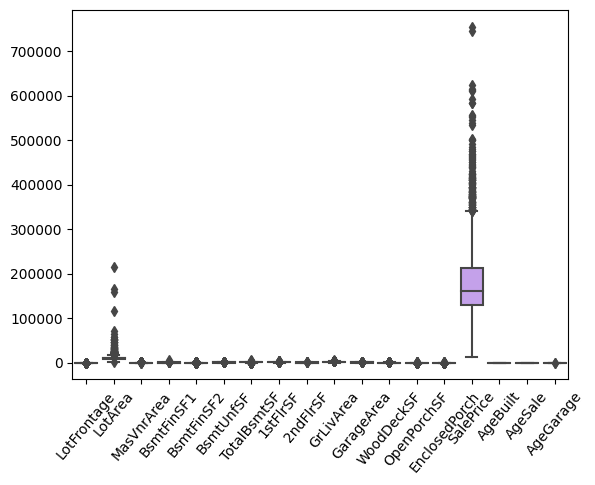

In [ ]:
sns.boxplot(num_cols_original)
plt.xticks(rotation=50)

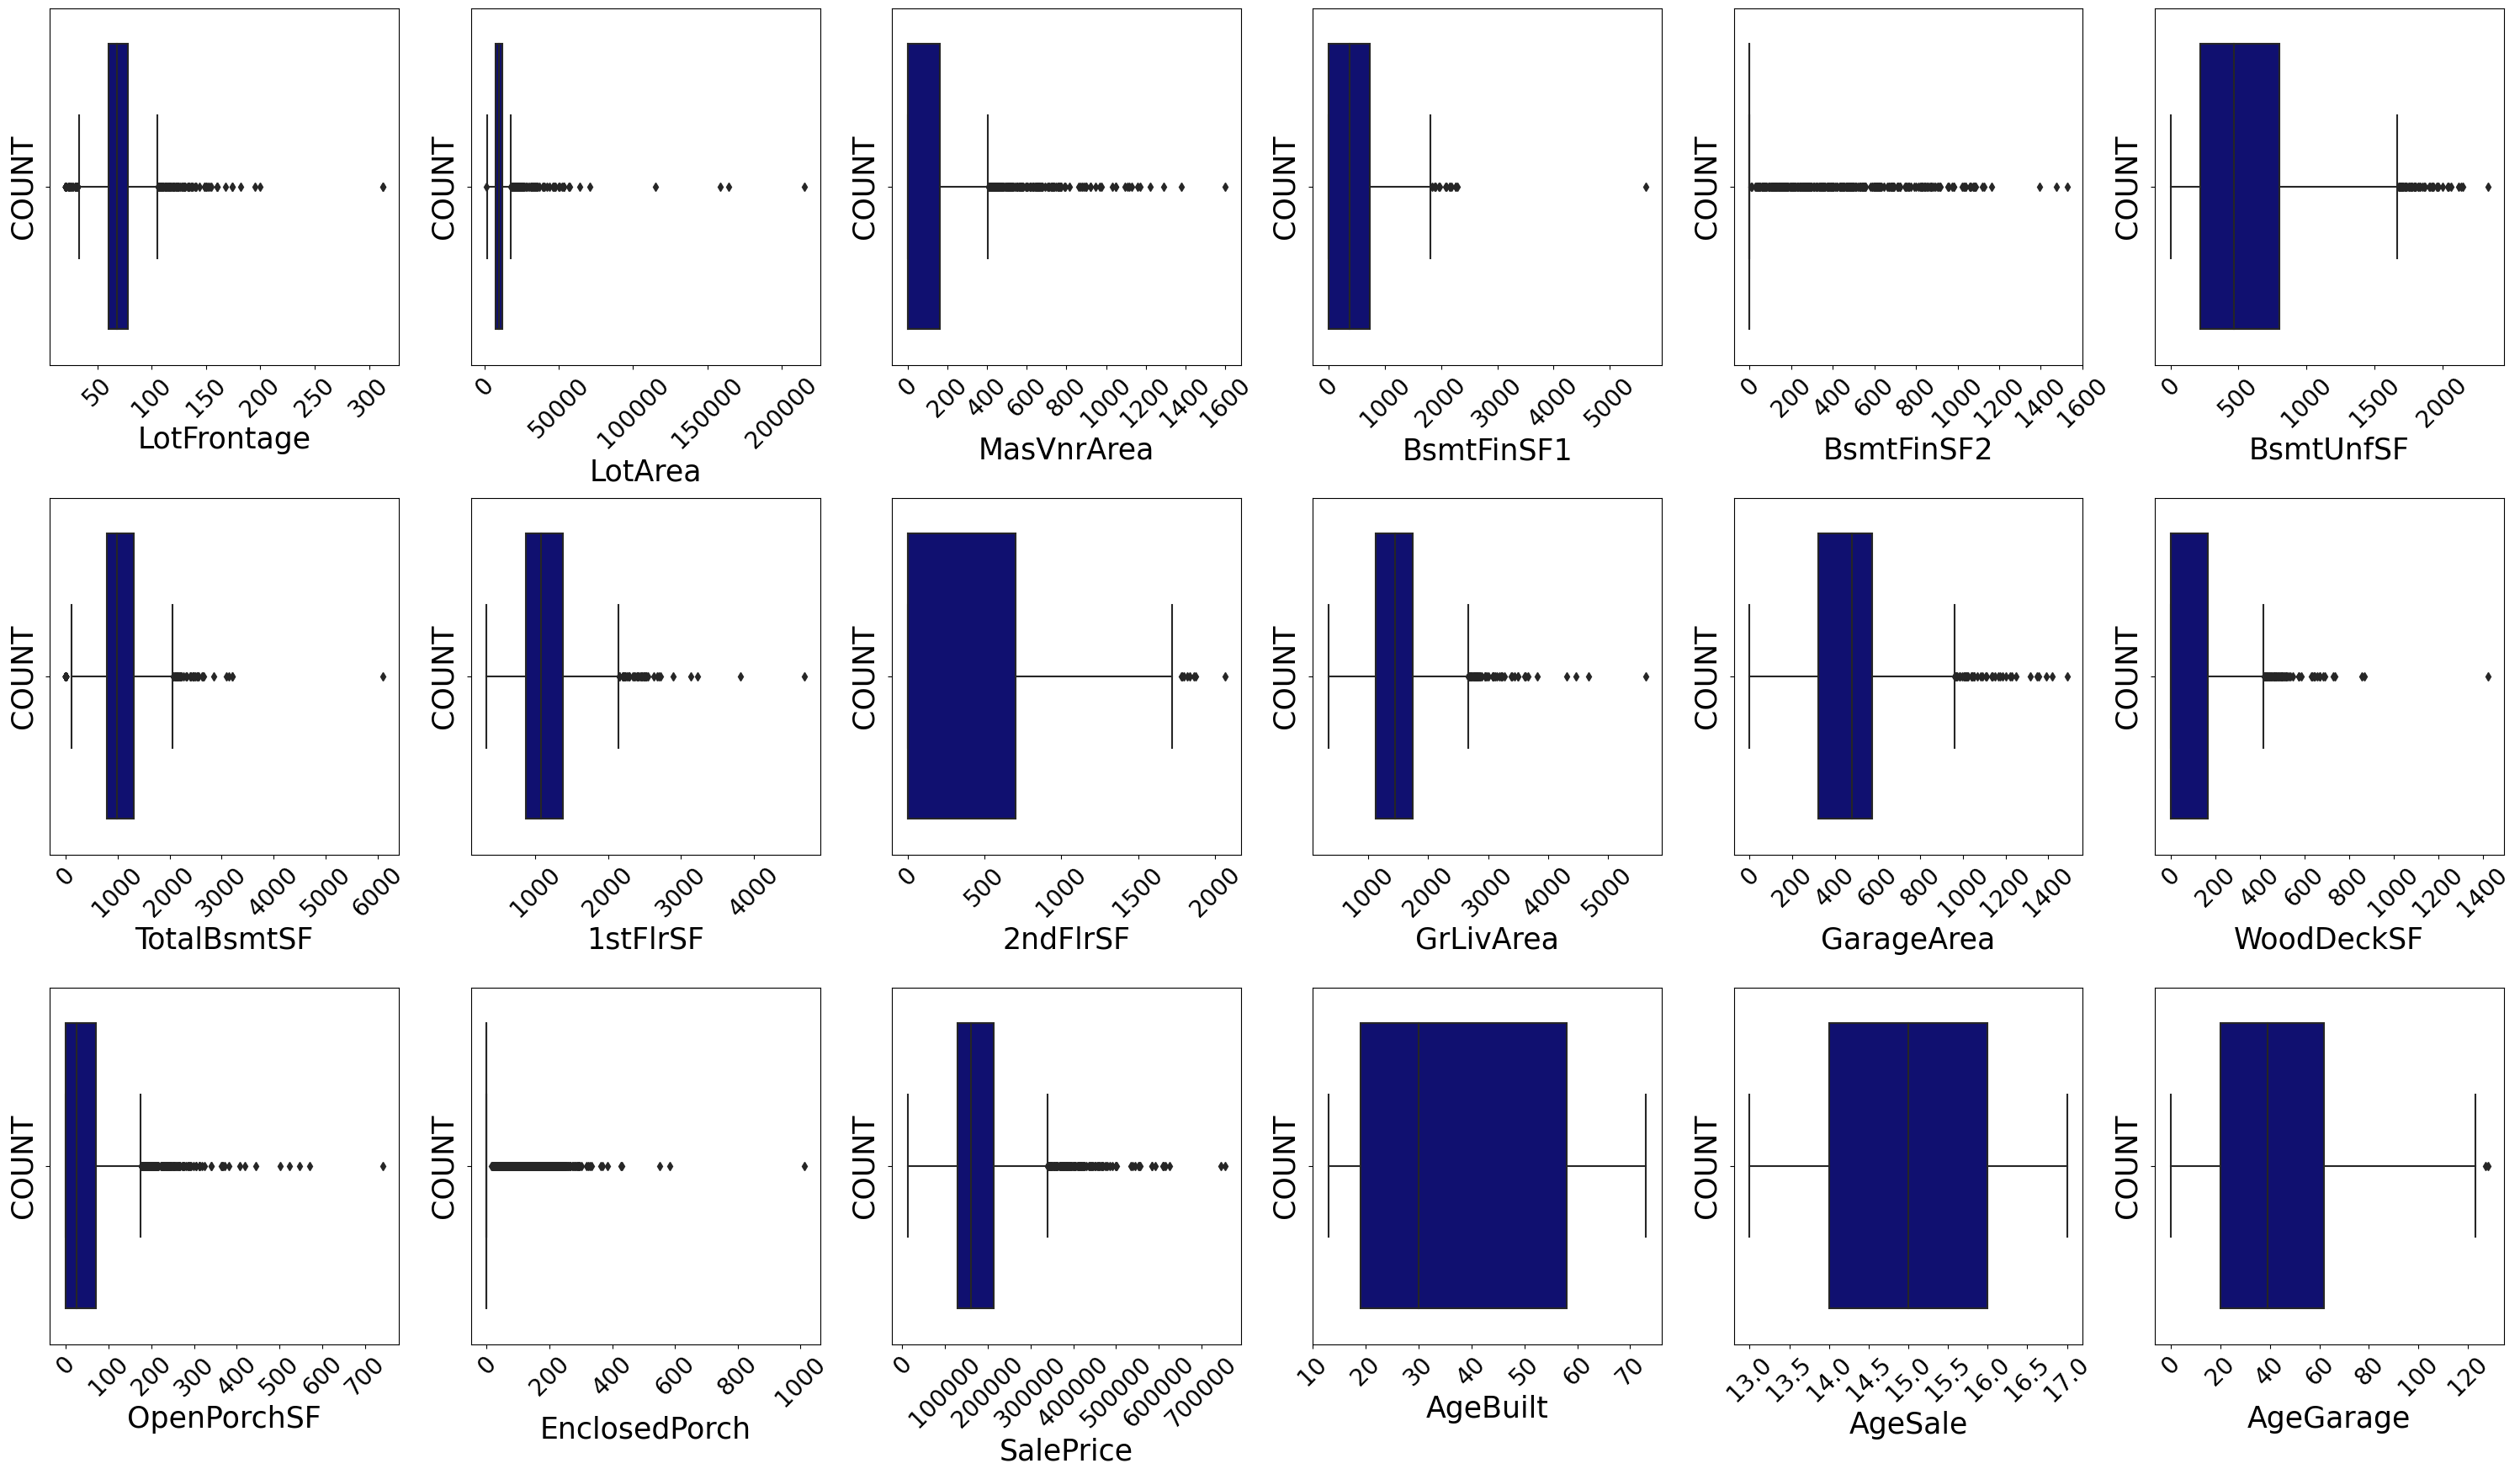

In [ ]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols_original):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=num_cols_original.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

In [ ]:
num_cols_original

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0   8450.0       196.0       706.0         0.0      150.0   
1            80.0   9600.0         0.0       978.0         0.0      284.0   
2            68.0  11250.0       162.0       486.0         0.0      434.0   
3            60.0   9550.0         0.0       216.0         0.0      540.0   
4            84.0  14260.0       350.0       655.0         0.0      490.0   
...           ...      ...         ...         ...         ...        ...   
1454         21.0   1936.0         0.0         0.0         0.0      546.0   
1455         21.0   1894.0         0.0       252.0         0.0      294.0   
1456        160.0  20000.0         0.0      1224.0         0.0        0.0   
1457         62.0  10441.0         0.0       337.0         0.0      575.0   
1458         74.0   9627.0        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0           856.0     856.0     854.0     1710.0       548.0         0.0   
1          1262.0    1262.0       0.0     1262.0       460.0       298.0   
2           920.0     920.0     866.0     1786.0       608.0         0.0   
3           756.0     961.0     756.0     1717.0       642.0         0.0   
4          1145.0    1145.0    1053.0     2198.0       836.0       192.0   
...           ...       ...       ...        ...         ...         ...   
1454        546.0     546.0     546.0     1092.0         0.0         0.0   
1455        546.0     546.0     546.0     1092.0       286.0         0.0   
1456       1224.0    1224.0       0.0     1224.0       576.0       474.0   
1457        912.0     970.0       0.0      970.0         0.0        80.0   
1458        996.0     996.0    1004.0     2000.0       650.0       190.0   

      OpenPorchSF  EnclosedPorch  SalePrice  AgeBuilt  AgeSale  AgeGarage  
0            61.0            0.0   208500.0      20.0     15.0       20.0  
1             0.0            0.0   181500.0      47.0     16.0       47.0  
2            42.0            0.0   223500.0      21.0     15.0       22.0  
3            35.0          272.0   140000.0      53.0     17.0       25.0  
4            84.0            0.0   250000.0      23.0     15.0       23.0  
...           ...            ...        ...       ...      ...        ...  
1454          0.0            0.0    90500.0      53.0     17.0        0.0  
1455         24.0            0.0    71000.0      53.0     17.0       53.0  
1456          0.0            0.0   131000.0      27.0     17.0       63.0  
1457         32.0            0.0   132000.0      31.0     17.0        0.0  
1458         48.0            0.0   188000.0      29.0     17.0       30.0  

[2913 rows x 18 columns]

In [ ]:
#def adjusted_quartiles(col):
#    median = np.median(col)
#   mad = np.median(np.abs(col - median))
 #   q1 = np.median(col[col <= median - 1.5 * mad])
  #  q3 = np.median(col[col >= median + 1.5 * mad])
   # return q1, q3

#def outlier_thresholds(dataframe, col_name):
#    q1, q3 = adjusted_quartiles(dataframe[col_name])
 #   quartile1 = q1
  #  quartile3 = q3
   # interquantile_range = quartile3 - quartile1
   # up_limit = quartile3 + 1.5 * interquantile_range
    #low_limit = quartile1 - 1.5 * interquantile_range
    #return low_limit, up_limit

#for col in num_cols_original.iloc[:,1:].columns:
 #   print(col, outlier_thresholds(train, col))


In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in num_cols_original.columns:
    print(col, outlier_thresholds(train, col))

LotFrontage (33.0, 105.0)
LotArea (1324.5, 17728.5)
MasVnrArea (-244.5, 407.5)
BsmtFinSF1 (-1099.5, 1832.5)
BsmtFinSF2 (0.0, 0.0)
BsmtUnfSF (-654.5, 1677.5)
TotalBsmtSF (29.5, 2065.5)
1stFlrSF (114.0, 2146.0)
2ndFlrSF (-1056.0, 1760.0)
GrLivArea (198.0, 2670.0)
GarageArea (-64.0, 960.0)
WoodDeckSF (-252.0, 420.0)
OpenPorchSF (-105.0, 175.0)
EnclosedPorch (0.0, 0.0)
SalePrice (2875.0, 339875.0)
AgeBuilt (-39.5, 116.5)
AgeSale (11.0, 19.0)
AgeGarage (-43.0, 125.0)


In [ ]:
# With the x function, we can confirm the existence of outliers in our variables.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False



for col in num_cols_original:
    print(col, check_outlier(train, col))

LotFrontage True
LotArea True
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
GrLivArea True
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
SalePrice True
AgeBuilt False
AgeSale False
AgeGarage True


In [ ]:
# We suppress our outliers with the 'replace_with_thresholds' function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols_original:
    replace_with_thresholds(train, col)

# When we check for outliers with the y function, we observe the result.
for col in num_cols_original:
    print(col, check_outlier(train, col))

LotFrontage False
LotArea False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
SalePrice False
AgeBuilt False
AgeSale False
AgeGarage False


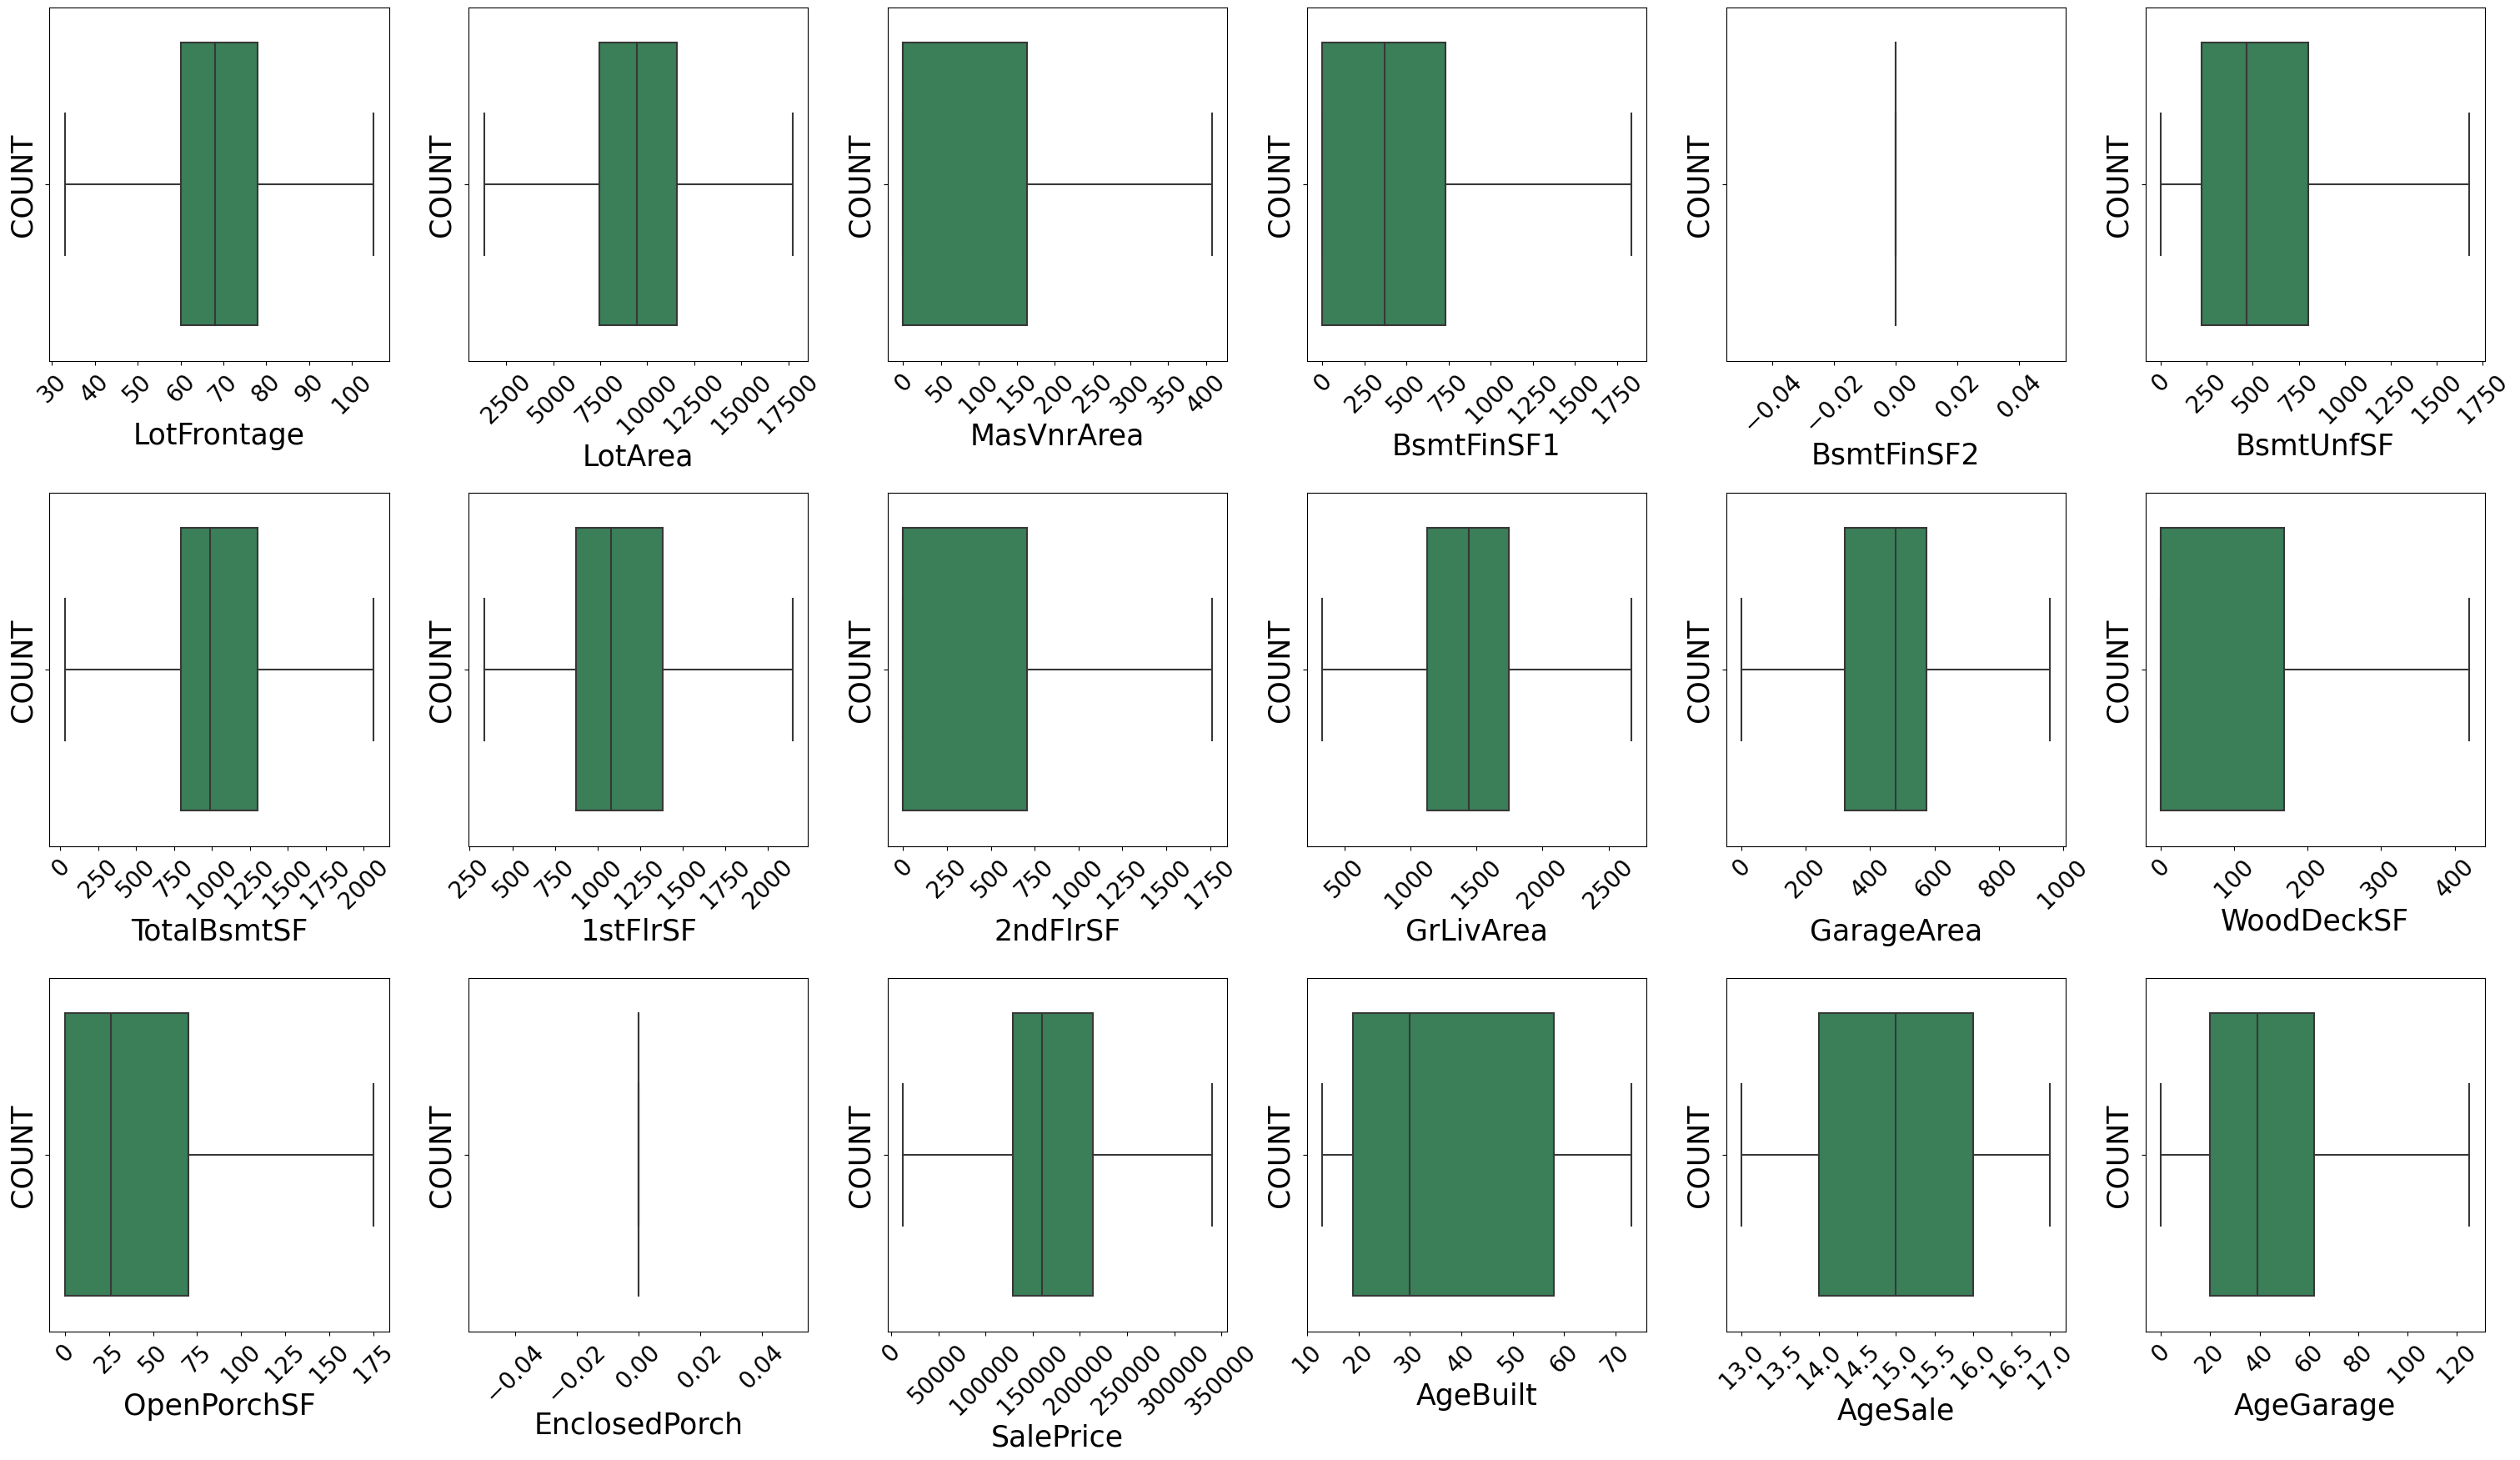

In [ ]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols_original):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=train.dropna(), color='seagreen')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

In [ ]:
train.describe().T

count           mean           std      min       25%  \
Id             2913.0    1459.691040    842.844923      1.0     730.0   
MSSubClass     2913.0      57.148987     42.528059     20.0      20.0   
LotFrontage    2913.0      68.470649     17.007672     33.0      60.0   
LotArea        2913.0    9577.275489   3612.429471   1324.5    7476.0   
OverallQual    2913.0       6.086165      1.408541      1.0       5.0   
OverallCond    2913.0       5.565396      1.113385      1.0       5.0   
MasVnrArea     2913.0      87.687951    133.045950      0.0       0.0   
BsmtFinSF1     2913.0     437.458634    437.076653      0.0       0.0   
BsmtFinSF2     2913.0       0.000000      0.000000      0.0       0.0   
BsmtUnfSF      2913.0     557.628905    431.059925      0.0     220.0   
TotalBsmtSF    2913.0    1044.828184    407.632701     29.5     793.0   
1stFlrSF       2913.0    1152.656368    364.374941    334.0     876.0   
2ndFlrSF       2913.0     336.320288    427.816448      0.0       0.0   
GrLivArea      2913.0    1489.987298    468.672917    334.0    1125.0   
BsmtFullBath   2913.0       0.429454      0.524716      0.0       0.0   
FullBath       2913.0       1.567800      0.553107      0.0       1.0   
HalfBath       2913.0       0.380021      0.502848      0.0       0.0   
BedroomAbvGr   2913.0       2.860625      0.821545      0.0       2.0   
KitchenAbvGr   2913.0       1.044628      0.214673      0.0       1.0   
TotRmsAbvGrd   2913.0       6.449365      1.561995      2.0       5.0   
Fireplaces     2913.0       0.596636      0.645953      0.0       0.0   
GarageCars     2913.0       1.766220      0.761766      0.0       1.0   
GarageArea     2913.0     470.469276    208.611283      0.0     320.0   
WoodDeckSF     2913.0      90.983179    115.828371      0.0       0.0   
OpenPorchSF    2913.0      43.452798     53.480309      0.0       0.0   
EnclosedPorch  2913.0       0.000000      0.000000      0.0       0.0   
MoSold         2913.0       6.213869      2.714795      1.0       4.0   
SalePrice      2913.0  176977.837968  68028.761348  12789.0  129250.0   
AgeBuilt       2913.0      38.750772     20.890783     13.0      19.0   
AgeSale        2913.0      15.205630      1.315042     13.0      14.0   
AgeGarage      2913.0      42.524545     26.538540      0.0      20.0   

                    50%       75%       max  
Id               1460.0    2189.0    2919.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        68.0      78.0     105.0  
LotArea          9453.0   11577.0   17728.5  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
MasVnrArea          0.0     163.0     407.5  
BsmtFinSF1        368.0     733.0    1832.5  
BsmtFinSF2          0.0       0.0       0.0  
BsmtUnfSF         467.0     803.0    1677.5  
TotalBsmtSF       988.0    1302.0    2065.5  
1stFlrSF         1082.0    1384.0    2146.0  
2ndFlrSF            0.0     704.0    1760.0  
GrLivArea        1444.0    1743.0    2670.0  
BsmtFullBath        0.0       1.0       3.0  
FullBath            2.0       2.0       4.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       4.0  
GarageCars          2.0       2.0       5.0  
GarageArea        480.0     576.0     960.0  
WoodDeckSF          0.0     168.0     420.0  
OpenPorchSF        26.0      70.0     175.0  
EnclosedPorch       0.0       0.0       0.0  
MoSold              6.0       8.0      12.0  
SalePrice      160000.0  213500.0  339875.0  
AgeBuilt           30.0      58.0      73.0  
AgeSale            15.0      16.0      17.0  
AgeGarage          39.0      62.0     125.0

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0  Absence      Reg   
1  2.0        20.0       RL         80.0   9600.0  Absence      Reg   
2  3.0        60.0       RL         68.0  11250.0  Absence      IR1   
3  4.0        70.0       RL         60.0   9550.0  Absence      IR1   
4  5.0        60.0       RL         84.0  14260.0  Absence      IR1   

  LandContour      LotConfig   Neighborhood  ... SaleCondition SalePrice  \
0         Lvl         Inside        CollgCr  ...        Normal  208500.0   
1         Lvl  rare_category  rare_category  ...        Normal  181500.0   
2         Lvl         Inside        CollgCr  ...        Normal  223500.0   
3         Lvl         Corner  rare_category  ...       Abnorml  140000.0   
4         Lvl  rare_category  rare_category  ...        Normal  250000.0   

  Fence_  Fireplace_  Garage_ Alley_ sold_season AgeBuilt AgeSale  AgeGarage  
0     No          No      Yes     No      Winter     20.0    15.0       20.0  
1     No         Yes      Yes     No      Spring     47.0    16.0       47.0  
2     No         Yes      Yes     No        Fall     21.0    15.0       22.0  
3     No         Yes      Yes     No      Winter     53.0    17.0       25.0  
4     No         Yes      Yes     No      Winter     23.0    15.0       23.0  

[5 rows x 71 columns]

### 2.3.C Creating New Features

In [ ]:
train['BsmtType1_ratio'] = train['BsmtFinSF1'] / train['TotalBsmtSF']
train['BsmtType2_ratio'] = train['BsmtFinSF2'] / train['TotalBsmtSF']
train['BsmtUnfinished_ratio'] = train['BsmtUnfSF'] / train['TotalBsmtSF']
train['enclosedporch_ratio'] = train['EnclosedPorch'] / train['LotArea']
train['Garage_ratio'] = train['GarageArea'] / train['LotArea']
train['OpenPorch_ratio'] = train['OpenPorchSF'] / train['LotArea']
train['TotalBsmt_ratio'] = train['TotalBsmtSF'] / train['LotArea']
train['WoodDeck_ratio'] = train['WoodDeckSF'] / train['LotArea']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2913 non-null   float64
 1   MSSubClass            2913 non-null   float64
 2   MSZoning              2913 non-null   object 
 3   LotFrontage           2913 non-null   float64
 4   LotArea               2913 non-null   float64
 5   Alley                 2913 non-null   object 
 6   LotShape              2913 non-null   object 
 7   LandContour           2913 non-null   object 
 8   LotConfig             2913 non-null   object 
 9   Neighborhood          2913 non-null   object 
 10  Condition1            2913 non-null   object 
 11  BldgType              2913 non-null   object 
 12  HouseStyle            2913 non-null   object 
 13  OverallQual           2913 non-null   float64
 14  OverallCond           2913 non-null   float64
 15  RoofStyle            

### 2.3.D Encoding (Label and One Hot)

In [ ]:
train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]

Alley LandContour       BsmtCond BsmtFinType2
0     Absence         Lvl             TA          Unf
1     Absence         Lvl             TA          Unf
2     Absence         Lvl             TA          Unf
3     Absence         Lvl  rare_category          Unf
4     Absence         Lvl             TA          Unf
...       ...         ...            ...          ...
1454  Absence         Lvl             TA          Unf
1455  Absence         Lvl             TA          Unf
1456  Absence         Lvl             TA          Unf
1457  Absence         Lvl             TA          Unf
1458  Absence         Lvl             TA          Unf

[2913 rows x 4 columns]

In [ ]:
for col in train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]:
  print(train[col].value_counts())

Absence          2716
rare_category     197
Name: Alley, dtype: int64
Lvl              2618
rare_category     295
Name: LandContour, dtype: int64
TA               2600
rare_category     313
Name: BsmtCond, dtype: int64
Unf              2487
rare_category     426
Name: BsmtFinType2, dtype: int64


In [ ]:
# TRAIN
from sklearn.preprocessing import LabelEncoder

binary_cols = [col for col in train.columns if train[col].dtypes == "O" and train[col].nunique() == 2]
binary_cols

# Binary kolonlar label encoder yapacağız.
labelencoder = LabelEncoder()

for col in binary_cols:
    labelencoder = LabelEncoder()
    train[col] = labelencoder.fit_transform(train[col])

In [ ]:
binary_cols

['Alley',
 'LandContour',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'Functional',
 'Fence_',
 'Fireplace_',
 'Garage_',
 'Alley_']

In [ ]:
for col in train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]:
  print(train[col].value_counts())

0    2716
1     197
Name: Alley, dtype: int64
0    2618
1     295
Name: LandContour, dtype: int64
0    2600
1     313
Name: BsmtCond, dtype: int64
0    2487
1     426
Name: BsmtFinType2, dtype: int64


In [ ]:
train.shape

(2913, 79)

In [ ]:
train.describe().T

count           mean           std           min  \
Id                    2913.0    1459.691040    842.844923      1.000000   
MSSubClass            2913.0      57.148987     42.528059     20.000000   
LotFrontage           2913.0      68.470649     17.007672     33.000000   
LotArea               2913.0    9577.275489   3612.429471   1324.500000   
Alley                 2913.0       0.067628      0.251149      0.000000   
LandContour           2913.0       0.101270      0.301738      0.000000   
OverallQual           2913.0       6.086165      1.408541      1.000000   
OverallCond           2913.0       5.565396      1.113385      1.000000   
MasVnrArea            2913.0      87.687951    133.045950      0.000000   
BsmtCond              2913.0       0.107449      0.309737      0.000000   
BsmtFinSF1            2913.0     437.458634    437.076653      0.000000   
BsmtFinType2          2913.0       0.146241      0.353408      0.000000   
BsmtFinSF2            2913.0       0.000000      0.000000      0.000000   
BsmtUnfSF             2913.0     557.628905    431.059925      0.000000   
TotalBsmtSF           2913.0    1044.828184    407.632701     29.500000   
CentralAir            2913.0       0.932715      0.250557      0.000000   
1stFlrSF              2913.0    1152.656368    364.374941    334.000000   
2ndFlrSF              2913.0     336.320288    427.816448      0.000000   
GrLivArea             2913.0    1489.987298    468.672917    334.000000   
BsmtFullBath          2913.0       0.429454      0.524716      0.000000   
FullBath              2913.0       1.567800      0.553107      0.000000   
HalfBath              2913.0       0.380021      0.502848      0.000000   
BedroomAbvGr          2913.0       2.860625      0.821545      0.000000   
KitchenAbvGr          2913.0       1.044628      0.214673      0.000000   
TotRmsAbvGrd          2913.0       6.449365      1.561995      2.000000   
Functional            2913.0       0.068658      0.252915      0.000000   
Fireplaces            2913.0       0.596636      0.645953      0.000000   
GarageCars            2913.0       1.766220      0.761766      0.000000   
GarageArea            2913.0     470.469276    208.611283      0.000000   
WoodDeckSF            2913.0      90.983179    115.828371      0.000000   
OpenPorchSF           2913.0      43.452798     53.480309      0.000000   
EnclosedPorch         2913.0       0.000000      0.000000      0.000000   
MoSold                2913.0       6.213869      2.714795      1.000000   
SalePrice             2913.0  176977.837968  68028.761348  12789.000000   
Fence_                2913.0       0.196018      0.397050      0.000000   
Fireplace_            2913.0       0.513217      0.499911      0.000000   
Garage_               2913.0       0.946104      0.225852      0.000000   
Alley_                2913.0       0.067628      0.251149      0.000000   
AgeBuilt              2913.0      38.750772     20.890783     13.000000   
AgeSale               2913.0      15.205630      1.315042     13.000000   
AgeGarage             2913.0      42.524545     26.538540      0.000000   
BsmtType1_ratio       2913.0       0.392062      0.344913      0.000000   
BsmtType2_ratio       2913.0       0.000000      0.000000      0.000000   
BsmtUnfinished_ratio  2913.0       0.535313      0.365875      0.000000   
enclosedporch_ratio   2913.0       0.000000      0.000000      0.000000   
Garage_ratio          2913.0       0.056517      0.037493      0.000000   
OpenPorch_ratio       2913.0       0.005129      0.007670      0.000000   
TotalBsmt_ratio       2913.0       0.126604      0.074517      0.001664   
WoodDeck_ratio        2913.0       0.010763      0.017044      0.000000   

                                25%            50%            75%  \
Id                       730.000000    1460.000000    2189.000000   
MSSubClass                20.000000      50.000000      70.000000   
LotFrontage               60.000000      68.000000      78.000000

In [ ]:
train['SaleCondition'].value_counts()

Normal           2398
Partial           243
Abnorml           190
rare_category      82
Name: SaleCondition, dtype: int64

In [ ]:
from sklearn.base import TransformerMixin
# TRAIN - Kategorik kolonlar için one hot encoder uygulayacağız.
num_cols = [col for col in train.columns if train[col].dtype != 'object']
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in num_cols]
cat_cols

encode_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [ ]:
encode_train.shape

(2913, 140)

In [ ]:
encode_train[['SaleCondition_Normal','SaleCondition_Partial','SaleCondition_rare_category']].head(6)

SaleCondition_Normal  SaleCondition_Partial  SaleCondition_rare_category
0                     1                      0                            0
1                     1                      0                            0
2                     1                      0                            0
3                     0                      0                            0
4                     1                      0                            0
5                     1                      0                            0

In [ ]:
encode_train

Id  MSSubClass  LotFrontage  LotArea  Alley  LandContour  \
0        1.0        60.0         65.0   8450.0      0            0   
1        2.0        20.0         80.0   9600.0      0            0   
2        3.0        60.0         68.0  11250.0      0            0   
3        4.0        70.0         60.0   9550.0      0            0   
4        5.0        60.0         84.0  14260.0      0            0   
...      ...         ...          ...      ...    ...          ...   
1454  2915.0       160.0         33.0   1936.0      0            0   
1455  2916.0       160.0         33.0   1894.0      0            0   
1456  2917.0        20.0        105.0  17728.5      0            0   
1457  2918.0        85.0         62.0  10441.0      0            0   
1458  2919.0        60.0         74.0   9627.0      0            0   

      OverallQual  OverallCond  MasVnrArea  BsmtCond  ...  Fence_MnPrv  \
0             7.0          5.0       196.0         0  ...            0   
1             6.0          8.0         0.0         0  ...            0   
2             7.0          5.0       162.0         0  ...            0   
3             7.0          5.0         0.0         1  ...            0   
4             8.0          5.0       350.0         0  ...            0   
...           ...          ...         ...       ...  ...          ...   
1454          4.0          7.0         0.0         0  ...            0   
1455          4.0          5.0         0.0         0  ...            0   
1456          5.0          7.0         0.0         0  ...            0   
1457          5.0          5.0         0.0         0  ...            1   
1458          7.0          5.0        94.0         0  ...            0   

      Fence_rare_category  SaleType_WD  SaleType_rare_category  \
0                       0            1                       0   
1                       0            1                       0   
2                       0            1                       0   
3                       0            1                       0   
4                       0            1                       0   
...                   ...          ...                     ...   
1454                    0            1                       0   
1455                    0            1                       0   
1456                    0            1                       0   
1457                    0            1                       0   
1458                    0            1                       0   

      SaleCondition_Normal  SaleCondition_Partial  \
0                        1                      0   
1                        1                      0   
2                        1                      0   
3                        0                      0   
4                        1                      0   
...                    ...                    ...   
1454                     1                      0   
1455                     0                      0   
1456                     0                      0   
1457                     1                      0   
1458                     1                      0   

      SaleCondition_rare_category  sold_season_Spring  sold_season_Summer  \
0                               0                   0                   0   
1                               0                   1                   0   
2                               0                   0                   0   
3                               0                   0                   0   
4                               0                   0                   0   
...                           ...                 ...                 ...   
1454                            0                   0                   1   
1455                            0                   1                   0   
1456                            0                   0                   0   
1457                            0                   0                   1   
145

# 3.Feature Selection

In [ ]:
id_col = encode_train['Id']  # Id kolonunu ayrı bir değişkende sakla
encode_train = encode_train.set_index('Id')  # Id kolonunu indeks olarak ayır

In [ ]:
encode_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'AgeBuilt', 'BsmtFinSF1', 'LotArea', 'OverallCond','SalePrice']]

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  AgeBuilt  BsmtFinSF1  \
Id                                                                              
1.0             7.0     1710.0        856.0         2.0      20.0       706.0   
2.0             6.0     1262.0       1262.0         2.0      47.0       978.0   
3.0             7.0     1786.0        920.0         2.0      21.0       486.0   
4.0             7.0     1717.0        756.0         3.0      53.0       216.0   
5.0             8.0     2198.0       1145.0         3.0      23.0       655.0   
...             ...        ...          ...         ...       ...         ...   
2915.0          4.0     1092.0        546.0         0.0      53.0         0.0   
2916.0          4.0     1092.0        546.0         1.0      53.0       252.0   
2917.0          5.0     1224.0       1224.0         2.0      27.0      1224.0   
2918.0          5.0      970.0        912.0         0.0      31.0       337.0   
2919.0          7.0     2000.0        996.0         3.0      29.0       758.0   

        LotArea  OverallCond  SalePrice  
Id                                       
1.0      8450.0          5.0   208500.0  
2.0      9600.0          8.0   181500.0  
3.0     11250.0          5.0   223500.0  
4.0      9550.0          5.0   140000.0  
5.0     14260.0          5.0   250000.0  
...         ...          ...        ...  
2915.0   1936.0          7.0    90500.0  
2916.0   1894.0          5.0    71000.0  
2917.0  17728.5          7.0   131000.0  
2918.0  10441.0          5.0   132000.0  
2919.0   9627.0          5.0   188000.0  

[2913 rows x 9 columns]

In [ ]:
y.mean()

12.0

In [ ]:
from sklearn.model_selection import train_test_split

X = encode_train.drop('SalePrice', axis=1)
y = encode_train['SalePrice']

X = X[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'AgeBuilt', 'BsmtFinSF1', 'LotArea', 'OverallCond']]
X_val = X.values
y_val = y.values


X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2330, 8)
(2330,)
(583, 8)
(583,)


In [ ]:
X

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  AgeBuilt  BsmtFinSF1  \
Id                                                                              
1.0             7.0     1710.0        856.0         2.0      20.0       706.0   
2.0             6.0     1262.0       1262.0         2.0      47.0       978.0   
3.0             7.0     1786.0        920.0         2.0      21.0       486.0   
4.0             7.0     1717.0        756.0         3.0      53.0       216.0   
5.0             8.0     2198.0       1145.0         3.0      23.0       655.0   
...             ...        ...          ...         ...       ...         ...   
2915.0          4.0     1092.0        546.0         0.0      53.0         0.0   
2916.0          4.0     1092.0        546.0         1.0      53.0       252.0   
2917.0          5.0     1224.0       1224.0         2.0      27.0      1224.0   
2918.0          5.0      970.0        912.0         0.0      31.0       337.0   
2919.0          7.0     2000.0        996.0         3.0      29.0       758.0   

        LotArea  OverallCond  
Id                            
1.0      8450.0          5.0  
2.0      9600.0          8.0  
3.0     11250.0          5.0  
4.0      9550.0          5.0  
5.0     14260.0          5.0  
...         ...          ...  
2915.0   1936.0          7.0  
2916.0   1894.0          5.0  
2917.0  17728.5          7.0  
2918.0  10441.0          5.0  
2919.0   9627.0          5.0  

[2913 rows x 8 columns]

In [ ]:
X_val

array([[7.00000e+00, 1.71000e+03, 8.56000e+02, ..., 7.06000e+02,
        8.45000e+03, 5.00000e+00],
       [6.00000e+00, 1.26200e+03, 1.26200e+03, ..., 9.78000e+02,
        9.60000e+03, 8.00000e+00],
       [7.00000e+00, 1.78600e+03, 9.20000e+02, ..., 4.86000e+02,
        1.12500e+04, 5.00000e+00],
       ...,
       [5.00000e+00, 1.22400e+03, 1.22400e+03, ..., 1.22400e+03,
        1.77285e+04, 7.00000e+00],
       [5.00000e+00, 9.70000e+02, 9.12000e+02, ..., 3.37000e+02,
        1.04410e+04, 5.00000e+00],
       [7.00000e+00, 2.00000e+03, 9.96000e+02, ..., 7.58000e+02,
        9.62700e+03, 5.00000e+00]])

# 4.Model Selection

In [ ]:
X_train

array([[5.0000e+00, 1.0940e+03, 1.0940e+03, ..., 7.2900e+02, 1.2450e+04,
        5.0000e+00],
       [6.0000e+00, 1.0400e+03, 1.0400e+03, ..., 8.7200e+02, 1.1500e+04,
        4.0000e+00],
       [6.0000e+00, 1.5730e+03, 7.5600e+02, ..., 4.1700e+02, 2.1170e+03,
        5.0000e+00],
       ...,
       [8.0000e+00, 2.0200e+03, 1.1280e+03, ..., 5.8400e+02, 9.8280e+03,
        5.0000e+00],
       [6.0000e+00, 1.0720e+03, 5.4700e+02, ..., 5.4700e+02, 3.6750e+03,
        5.0000e+00],
       [5.0000e+00, 1.0390e+03, 1.0390e+03, ..., 8.4100e+02, 1.1625e+04,
        4.0000e+00]])

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train the model
xgboostmodel = XGBRegressor()
xgboostmodel.fit(X_train, y_train)

import pickle
pickle.dump(xgboostmodel, open('xgb_model6.pkl', 'wb'))